# Lab 09 XOR - Logistic Regression - Eager Excuetion
* XOR 문제를 Logistic Regression을 활용해 풀어보도록 하겠습니다.

### 기본 Library 선언 및 Tensorflow 버전 확인

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tqdm.auto import tqdm
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from time import time
import os

tf.random.set_seed(7)  # for reproducibility

print(tf.__version__)

2.13.0


### 강의에 설명한 Data

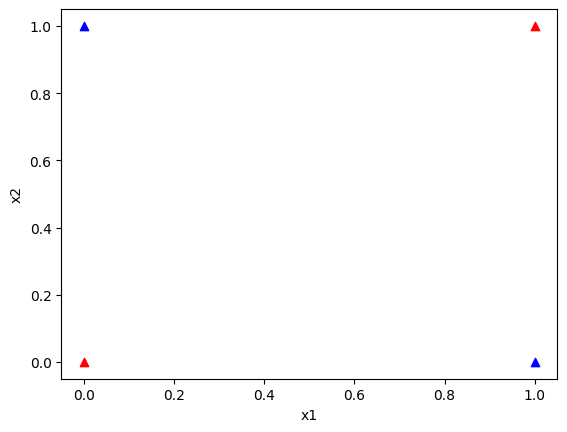

In [10]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

##  Tensorflow Eager
### 위 Data를 기준으로 XOR처리를 위한 모델 구현
* Tensorflow data API를 통해 학습시킬 값들을 담는다 (Batch Size는 한번에 학습시킬 Size로 정한다)
* preprocess function으로 features,labels는 실제 학습에 쓰일 Data 연산을 위해 Type를 맞춰준다

In [11]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

## 1) Logistic Regression for XOR
### W와 b은 학습을 통해 생성되는 모델에 쓰이는 Weight와 Bias (초기값을 variable : 0이나 Random값으로 가능 tf.random.normal([2, 1]) )

In [59]:
W = tf.Variable(tf.random.normal((2,1)), name='weight')
b = tf.Variable(tf.zeros((1,)), name='bias')
print("W = {}, B = {}".format(W.numpy(), b.numpy()))

W = [[-0.43624166]
 [ 0.98677576]], B = [0.]


### Sigmoid 함수를 가설로 선언합니다
* Sigmoid는 0과 1의 값만을 리턴 // tf.sigmoid(tf.matmul(X, W) + b)

$$
\begin{align}
sigmoid(x) & = \frac{1}{1+e^{-x}}  \\\\\
\end{align}
$$

In [60]:
def logistic_regression(features):
    hypothesis  = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

### 가설을 검증할 Cost 함수
$$
\begin{align}
cost(h(x),y) & = −log(h(x))  &  if  &  y=1 \\\\\
cost(h(x),y) & = -log(1−h(x))  &  if  &  y=0
\end{align}
$$

$$
\begin{align}
cost(h(x),y) & = −y log(h(x))−(1−y)log(1−h(x))
\end{align}
$$

In [61]:
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

### 추론한 값은 0.5를 기준(Sigmoid 그래프 참조)로 0과 1의 값을 리턴
* Sigmoid 함수를 통해 예측값이 0.5보다 크면 1을 반환하고 0.5보다 작으면 0으로 반환

In [62]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

### GradientTape를 통해 경사값을 계산

In [63]:
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

### Tensorflow를 통한 실행을 위해 Session를 선언합니다.
* 위의 Data를 Cost함수를 통해 학습시킨 후 모델을 생성합니다. 

In [65]:
EPOCHS = 5001

for step in range(EPOCHS):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
print("W = {}, B = {}".format(W.numpy(), b.numpy()))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(logistic_regression(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6962
Iter: 100, Loss: 0.6959
Iter: 200, Loss: 0.6956
Iter: 300, Loss: 0.6953
Iter: 400, Loss: 0.6950
Iter: 500, Loss: 0.6948
Iter: 600, Loss: 0.6946
Iter: 700, Loss: 0.6945
Iter: 800, Loss: 0.6943
Iter: 900, Loss: 0.6942
Iter: 1000, Loss: 0.6941
Iter: 1100, Loss: 0.6940
Iter: 1200, Loss: 0.6939
Iter: 1300, Loss: 0.6938
Iter: 1400, Loss: 0.6937
Iter: 1500, Loss: 0.6937
Iter: 1600, Loss: 0.6936
Iter: 1700, Loss: 0.6936
Iter: 1800, Loss: 0.6935
Iter: 1900, Loss: 0.6935
Iter: 2000, Loss: 0.6934
Iter: 2100, Loss: 0.6934
Iter: 2200, Loss: 0.6934
Iter: 2300, Loss: 0.6934
Iter: 2400, Loss: 0.6933
Iter: 2500, Loss: 0.6933
Iter: 2600, Loss: 0.6933
Iter: 2700, Loss: 0.6933
Iter: 2800, Loss: 0.6933
Iter: 2900, Loss: 0.6933
Iter: 3000, Loss: 0.6932
Iter: 3100, Loss: 0.6932
Iter: 3200, Loss: 0.6932
Iter: 3300, Loss: 0.6932
Iter: 3400, Loss: 0.6932
Iter: 3500, Loss: 0.6932
Iter: 3600, Loss: 0.6932
Iter: 3700, Loss: 0.6932
Iter: 3800, Loss: 0.6932
Iter: 3900, Loss: 0.6932
Iter: 4000, 

# Lab 09 XOR - Neural Network - Eager Excution


## 퍼셉트론이란?
- 인공 신경망의 구성 요소로서, 여러 입력 값을 하나의 출력 값으로 반환하는 역할을 한다.

- Perception (지각 능력) + neuron (뇌의 신경 세포)

- 퍼셉트론은 인간 신경계의 기본 단위인 뉴런을 본떠 만들었으며 통계적으로 모델링한 알고리즘이다.

뉴런과 퍼셉트론 비교
- 뉴런: 저장한 신호 또는 자극의 크기가 임계값을 넘어갈 경우 축삭 돌기를 통해 외부로 전달
- 퍼셉트론: 입력된 값과 가중치의 곱(+편차)을 활성화 함수의 임계값과 비교하여 출력 값을 결정
	-> ex. 즉, 활성화 함수는 퍼셉트론의
	출력 값을 결정하는 역할을 하며
	그 종류에는 sign, sigmoid, tanh, ReLU 등이 있다.

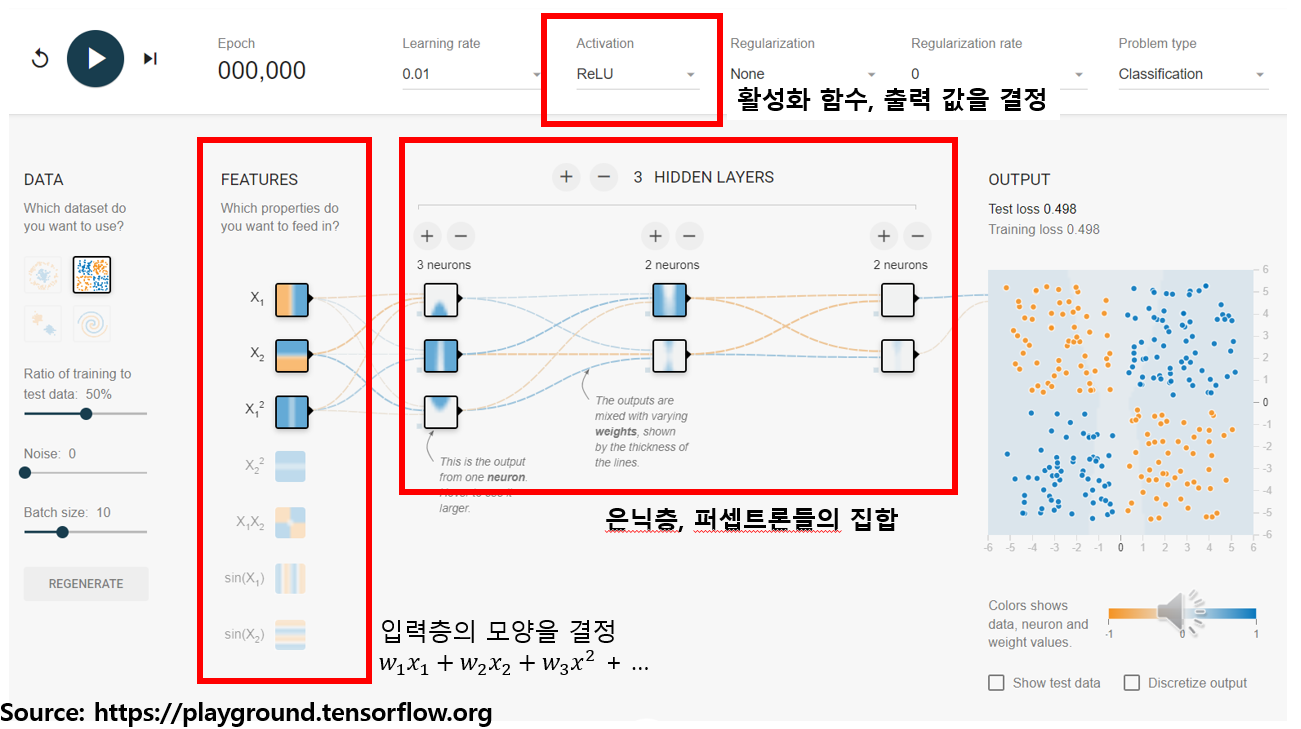

## Neural Network를 통해 XOR해결 
* 위의 Data를 3Layer의 Neural Network를 통해 학습시킨 후 모델을 생성

In [15]:
W1 = tf.Variable(tf.random.normal((2, 1)), name='weight1')
b1 = tf.Variable(tf.random.normal((1,)), name='bias1')

W2 = tf.Variable(tf.random.normal((2, 1)), name='weight2')
b2 = tf.Variable(tf.random.normal((1,)), name='bias2')

W3 = tf.Variable(tf.random.normal((2, 1)), name='weight3')
b3 = tf.Variable(tf.random.normal((1,)), name='bias3')

In [16]:
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    layer3 = tf.concat([layer1, layer2],-1)
    layer3 = tf.reshape(layer3, shape = [-1,2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)
    return hypothesis

def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features),labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])

In [17]:
EPOCHS = 500

for step in tqdm(range(EPOCHS)):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, b1, b2, b3]))
        if step % 50 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(neural_net(features),labels)))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

  0%|          | 0/500 [00:00<?, ?it/s]

Iter: 0, Loss: 0.8660
Iter: 50, Loss: 0.8126
Iter: 100, Loss: 0.7752
Iter: 150, Loss: 0.7495
Iter: 200, Loss: 0.7319
Iter: 250, Loss: 0.7200
Iter: 300, Loss: 0.7118
Iter: 350, Loss: 0.7063
Iter: 400, Loss: 0.7025
Iter: 450, Loss: 0.6998
Testset Accuracy: 0.5000


# Lab 09 XOR - Deep Neural Network - Eager
* XOR 문제를 Deep Neural Network 활용해 풀어보도록 하겠습니다.

## 순전파 vs 역전파

- 순전파: 입력 데이터에서부터 은닉층, 출력층까지 변수를 계산하고 결과를 도출
- 역전파: 순전파 결과와 input & output을 가지고 출력층에서부터 입력층으로 돌아가며 가중치를 업데이트한다. 이때, 학습률 (learning rate)를 설정하여 가중치의 업데이트 정도를 결정한다.

- 역전파의 목표는 ‘최적의 가중치를 찾는 것’이다.

- 역전파가 최적의 가중치를 찾는 기준은
	- 가중치 변화에 대한 총 에러의 변화를 최소화하는 가중치를 찾는 것이다.<br>
    -> (𝝏𝑬_𝒕𝒐𝒕𝒂𝒍)/𝝏𝑾, 𝐄:𝐄𝐫𝐫𝐨𝐫, 𝐖:𝐖𝐞𝐢𝐠𝐡𝐭

그러나 Error를 구하는 식에서는 가중치에 대해서 바로 편미분할 수 없다.

𝑬_𝒕𝒐𝒕𝒂𝒍= 〖𝑬𝒓𝒓𝒐𝒓〗_𝟏+〖𝑬𝒓𝒓𝒐𝒓〗_𝟐=〖(𝒀〗_(𝟏,𝒓𝒆𝒂𝒍)−𝒀_(𝟏,𝒑𝒓𝒆𝒅𝒊𝒄𝒕))+〖(𝒀〗_(𝟐,𝒓𝒆𝒂𝒍)−𝒀_(𝟐,𝒑𝒓𝒆𝒅𝒊𝒄𝒕))
(𝝏𝑬_𝒕𝒐𝒕𝒂𝒍)/(𝝏𝒘_𝟐𝟏 )=???


따라서, 미분의 연쇄 법칙을 활용하여 다음과 같이 (𝝏𝑬_𝒕𝒐𝒕𝒂𝒍)/(𝝏𝒘_𝟐𝟏 )를 계산 가능하도록 만든다.

(𝝏𝑬_𝒕𝒐𝒕𝒂𝒍)/(𝝏𝒘_𝟐𝟏 )=(𝝏𝑬_𝒕𝒐𝒕𝒂𝒍)/(𝝏𝒀_𝟏 )  (𝝏𝒀_𝟏)/(𝝏𝒚_𝟏 )  (𝝏𝒚_𝟏)/(𝝏𝒘_𝟐𝟏 )


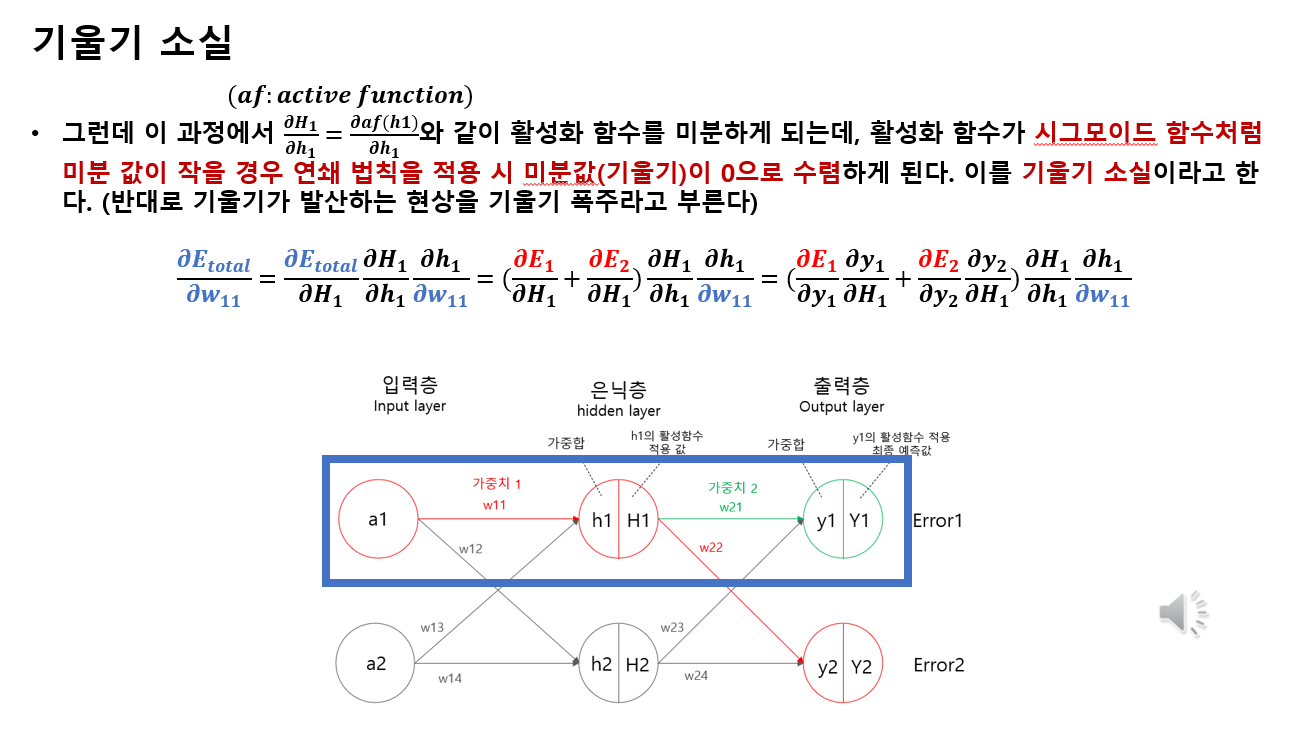

In [74]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))
nb_classes = 10
EPOCHS = 10000

class wide_deep_nn():
    def __init__(self, nb_classes, EPOCHS):
        super(wide_deep_nn, self).__init__()        
     
        self.W1 = tf.Variable(tf.random.normal((2, nb_classes)), name='weight1')
        self.b1 = tf.Variable(tf.random.normal((nb_classes,)), name='bias1')

        self.W2 = tf.Variable(tf.random.normal((nb_classes, nb_classes)), name='weight2')
        self.b2 = tf.Variable(tf.random.normal((nb_classes,)), name='bias2')

        self.W3 = tf.Variable(tf.random.normal((nb_classes, nb_classes)), name='weight3')
        self.b3 = tf.Variable(tf.random.normal((nb_classes,)), name='bias3')

        self.W4 = tf.Variable(tf.random.normal((nb_classes, 1)), name='weight4')
        self.b4 = tf.Variable(tf.random.normal((1,)), name='bias4')
        
        self.variables = [self.W1,self.b1,self.W2,self.b2,self.W3,self.b3,self.W4,self.b4]
        self.EPOCHS = EPOCHS
        
    def preprocess_data(self, features, labels):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        return features, labels
        
    def deep_nn(self, features):
        layer1 = tf.sigmoid(tf.matmul(features, self.W1) + self.b1)
        layer2 = tf.sigmoid(tf.matmul(layer1, self.W2) + self.b2)
        layer3 = tf.sigmoid(tf.matmul(layer2, self.W3) + self.b3)
        hypothesis = tf.sigmoid(tf.matmul(layer3, self.W4) + self.b4)
        return hypothesis
    
    def loss_fn(self, hypothesis, features, labels):
        cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
        return cost

    def accuracy_fn(self, hypothesis, labels):
        predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
        accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
        return accuracy

    def grad(self, hypothesis, features, labels):
        with tf.GradientTape() as tape:
            loss_value = self.loss_fn(self.deep_nn(features),features,labels)
        return tape.gradient(loss_value,self.variables)
    
    def fit(self, dataset, EPOCHS=EPOCHS, verbose=500):
        optimizer =  tf.keras.optimizers.SGD(learning_rate=0.01)
        for step in tqdm(range(EPOCHS)):
            for features, labels  in dataset:
                features, labels = self.preprocess_data(features, labels)
                grads = self.grad(self.deep_nn(features), features, labels)
                optimizer.apply_gradients(grads_and_vars=zip(grads, self.variables))
                if step % verbose == 0:
                    print("Iter: {}, Loss: {:.4f}".format(step, self.loss_fn(self.deep_nn(features),features,labels)))

    def test_model(self,x_data, y_data):
        x_data, y_data = self.preprocess_data(x_data, y_data)
        test_acc = self.accuracy_fn(self.deep_nn(x_data),y_data)
        print("Testset Accuracy: {:.4f}".format(test_acc))

Deep Neural Network를 통해 XOR해결 
* 위의 Data를 4Layer의 Neural Network를 통해 학습시킨 후 모델을 생성합니다. 

In [75]:
model = wide_deep_nn(nb_classes, 10000)

In [76]:
model.fit(dataset)

  0%|          | 0/10000 [00:00<?, ?it/s]

Iter: 0, Loss: 0.7459
Iter: 500, Loss: 0.6823
Iter: 1000, Loss: 0.6789
Iter: 1500, Loss: 0.6748
Iter: 2000, Loss: 0.6697
Iter: 2500, Loss: 0.6631
Iter: 3000, Loss: 0.6547
Iter: 3500, Loss: 0.6437
Iter: 4000, Loss: 0.6294
Iter: 4500, Loss: 0.6104
Iter: 5000, Loss: 0.5853
Iter: 5500, Loss: 0.5524
Iter: 6000, Loss: 0.5099
Iter: 6500, Loss: 0.4573
Iter: 7000, Loss: 0.3965
Iter: 7500, Loss: 0.3323
Iter: 8000, Loss: 0.2710
Iter: 8500, Loss: 0.2178
Iter: 9000, Loss: 0.1746
Iter: 9500, Loss: 0.1409


In [77]:
model.test_model(x_data, y_data)

Testset Accuracy: 1.0000


# Lab 09 XOR - tensorboard - eager
* XOR 문제를 Deep Neural Network 활용해 풀어보고 Tensorboard에 출력해 보도록 하겠습니다.

* summary 값을 logs폴더에 저장하고 아래 명령어로 실행해서 확인한다 (http://0.0.0.0:6006)
* tensorboard --logdir=./logs/xor

In [78]:
log_path = "./logs/xor"
writer = tf.summary.create_file_writer(log_path)

### Deep Neural Network를 통해 XOR해결 
* 각각의 값을 histogram으로 tensorboard에 저장한다 (Model)
* 각각의 값을 scalar값으로 tensorboard에 저장한다 (cost, accuracy)

In [79]:
W1 = tf.Variable(tf.random.normal((2, 10)), name='weight1')
b1 = tf.Variable(tf.random.normal((10,)), name='bias1')

W2 = tf.Variable(tf.random.normal((10, 10)), name='weight2')
b2 = tf.Variable(tf.random.normal((10,)), name='bias2')

W3 = tf.Variable(tf.random.normal((10, 10)), name='weight3')
b3 = tf.Variable(tf.random.normal((10,)), name='bias3')

W4 = tf.Variable(tf.random.normal((10, 1)), name='weight4')
b4 = tf.Variable(tf.random.normal((1,)), name='bias4')

def neural_net(features, step):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)
    layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)
    hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)

    with writer.as_default():
        tf.summary.histogram("weights1", W1, step=step)
        tf.summary.histogram("biases1", b1, step=step)
        tf.summary.histogram("layer1", layer1, step=step)

        tf.summary.histogram("weights2", W2, step=step)
        tf.summary.histogram("biases2", b2, step=step)
        tf.summary.histogram("layer2", layer2, step=step)

        tf.summary.histogram("weights3", W3, step=step)
        tf.summary.histogram("biases3", b3, step=step)
        tf.summary.histogram("layer3", layer3, step=step)

        tf.summary.histogram("weights4", W4, step=step)
        tf.summary.histogram("biases4", b4, step=step)
        tf.summary.histogram("hypothesis", hypothesis, step=step)
    return hypothesis

def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    with writer.as_default():
        tf.summary.scalar('loss', cost, step=step)
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

def grad(hypothesis, features, labels, step):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features, step),labels)
    return tape.gradient(loss_value, [W1, W2, W3, W4, b1, b2, b3, b4])

In [80]:
EPOCHS = 3000

for step in tqdm(range(EPOCHS)):    
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features, step), features, labels, step)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, W4, b1, b2, b3, b4]))
        if step % 50 == 0:
            loss_value = loss_fn(neural_net(features, step),labels)
            print("Iter: {}, Loss: {:.4f}".format(step, loss_value))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data, step),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

  0%|          | 0/3000 [00:00<?, ?it/s]

Iter: 0, Loss: 2.3776
Iter: 50, Loss: 0.6973
Iter: 100, Loss: 0.6925
Iter: 150, Loss: 0.6887
Iter: 200, Loss: 0.6853
Iter: 250, Loss: 0.6822
Iter: 300, Loss: 0.6790
Iter: 350, Loss: 0.6757
Iter: 400, Loss: 0.6722
Iter: 450, Loss: 0.6683
Iter: 500, Loss: 0.6639
Iter: 550, Loss: 0.6589
Iter: 600, Loss: 0.6531
Iter: 650, Loss: 0.6462
Iter: 700, Loss: 0.6381
Iter: 750, Loss: 0.6285
Iter: 800, Loss: 0.6170
Iter: 850, Loss: 0.6030
Iter: 900, Loss: 0.5862
Iter: 950, Loss: 0.5658
Iter: 1000, Loss: 0.5411
Iter: 1050, Loss: 0.5113
Iter: 1100, Loss: 0.4761
Iter: 1150, Loss: 0.4355
Iter: 1200, Loss: 0.3905
Iter: 1250, Loss: 0.3432
Iter: 1300, Loss: 0.2964
Iter: 1350, Loss: 0.2529
Iter: 1400, Loss: 0.2148
Iter: 1450, Loss: 0.1826
Iter: 1500, Loss: 0.1561
Iter: 1550, Loss: 0.1346
Iter: 1600, Loss: 0.1172
Iter: 1650, Loss: 0.1030
Iter: 1700, Loss: 0.0914
Iter: 1750, Loss: 0.0818
Iter: 1800, Loss: 0.0738
Iter: 1850, Loss: 0.0670
Iter: 1900, Loss: 0.0612
Iter: 1950, Loss: 0.0562
Iter: 2000, Loss: 0.051

## (Optional) Jupyter Notebook에서 Tensorboard 실행하기

In [85]:
# Load the TensorBoard notebook extension
%reload_ext tensorboard

In [87]:
'''Start TensorBoard through the command line or within a notebook experience. 
The two interfaces are generally the same. In notebooks, use the %tensorboard line magic. 
On the command line, run the same command without "%".'''

%tensorboard --logdir logs/xor

Reusing TensorBoard on port 6006 (pid 16656), started 1 day, 0:49:35 ago. (Use '!kill 16656' to kill it.)

# Lab-10-1-1-mnist_nn_softmax

## Checkpoint function

In [12]:
def load(model, checkpoint_dir):
    print(" [*] Reading checkpoints...")

    ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
    if ckpt :
        ckpt_name = os.path.basename(ckpt.model_checkpoint_path)
        checkpoint = tf.train.Checkpoint(dnn=model)
        checkpoint.restore(save_path=os.path.join(checkpoint_dir, ckpt_name))
        counter = int(ckpt_name.split('-')[1])
        print(" [*] Success to read {}".format(ckpt_name))
        return True, counter
    else:
        print(" [*] Failed to find a checkpoint")
        return False, 0

def check_folder(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)
    return dir

## Data load & pre-processing function

In [13]:
def load_mnist() :
    (train_data, train_labels), (test_data, test_labels) = mnist.load_data()
    train_data = np.expand_dims(train_data, axis=-1) # [N, 28, 28] -> [N, 28, 28, 1]
    test_data = np.expand_dims(test_data, axis=-1) # [N, 28, 28] -> [N, 28, 28, 1]

    train_data, test_data = normalize(train_data, test_data)

    train_labels = to_categorical(train_labels, 10) # [N,] -> [N, 10]
    test_labels = to_categorical(test_labels, 10) # [N,] -> [N, 10]

    return train_data, train_labels, test_data, test_labels

def normalize(train_data, test_data):
    train_data = train_data.astype(np.float32) / 255.0
    test_data = test_data.astype(np.float32) / 255.0

    return train_data, test_data

## Performance function

In [14]:
def loss_fn(model, images, labels):
    logits = model(images, training=True)    
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_pred=logits, y_true=labels, 
                                                                   from_logits=True))
    return loss

def accuracy_fn(model, images, labels):
    logits = model(images, training=False)
    prediction = tf.equal(tf.argmax(logits, -1), tf.argmax(labels, -1))
    accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))
    return accuracy

def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

## Model function

In [15]:
def flatten() :
    return tf.keras.layers.Flatten()

def dense(label_dim, weight_init) :
    return tf.keras.layers.Dense(units=label_dim, use_bias=True, kernel_initializer=weight_init)

def sigmoid() :
    return tf.keras.layers.Activation(tf.keras.activations.sigmoid)

## Create model (class version)

In [16]:
class create_model_class(tf.keras.Model):
    def __init__(self, label_dim):
        super(create_model_class, self).__init__()
        weight_init = tf.keras.initializers.RandomNormal()

        self.model = tf.keras.Sequential()
        self.model.add(flatten())

        for i in range(2):
            self.model.add(dense(256, weight_init))
            self.model.add(sigmoid())

        self.model.add(dense(label_dim, weight_init))

    def call(self, x, training=None, mask=None):
        x = self.model(x)

        return x

## Create model (function version)

In [17]:
def create_model_function(label_dim) :
    weight_init = tf.keras.initializers.RandomNormal()

    model = tf.keras.Sequential()
    model.add(flatten())

    for i in range(2) :
        model.add(dense(256, weight_init))
        model.add(sigmoid())

    model.add(dense(label_dim, weight_init))

    return model

## Define data & hyper-parameter

In [18]:
""" dataset """
train_x, train_y, test_x, test_y = load_mnist()

""" parameters """
learning_rate = 0.001
batch_size = 128

training_epochs = 1
training_iterations = len(train_x) // batch_size

label_dim = 10

train_flag = True

""" Graph Input using Dataset API """
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=batch_size).\
    batch(batch_size, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=len(test_x)).\
    batch(len(test_x))

## Define model & optimizer & writer

In [19]:
""" Model """
network = create_model_function(label_dim)

""" Training """
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

""" Writer """
checkpoint_dir = 'checkpoints'
logs_dir = 'logs'

model_dir = 'nn_softmax'

checkpoint_dir = os.path.join(checkpoint_dir, model_dir)
check_folder(checkpoint_dir)
checkpoint_prefix = os.path.join(checkpoint_dir, model_dir)
logs_dir = os.path.join(logs_dir, model_dir)

## Restore checkpoint & start train or test phase

In [20]:
if train_flag :

    checkpoint = tf.train.Checkpoint(dnn=network)

    # create writer for tensorboard
    summary_writer = tf.summary.create_file_writer(logdir=logs_dir)
    start_time = time()

    # restore check-point if it exits
    could_load, checkpoint_counter = load(network, checkpoint_dir)    

    if could_load:
        start_epoch = (int)(checkpoint_counter / training_iterations)        
        counter = checkpoint_counter        
        print(" [*] Load SUCCESS")
    else:
        start_epoch = 0
        start_iteration = 0
        counter = 0
        print(" [!] Load failed...")
    
    # train phase
    with summary_writer.as_default():  # for tensorboard
        for epoch in range(start_epoch, training_epochs):
            for idx, (train_input, train_label) in enumerate(train_dataset):            
                grads = grad(network, train_input, train_label)
                optimizer.apply_gradients(grads_and_vars=zip(grads, network.variables))

                train_loss = loss_fn(network, train_input, train_label)
                train_accuracy = accuracy_fn(network, train_input, train_label)
                
                for test_input, test_label in test_dataset:                
                    test_accuracy = accuracy_fn(network, test_input, test_label)

                tf.summary.scalar(name='train_loss', data=train_loss, step=counter)
                tf.summary.scalar(name='train_accuracy', data=train_accuracy, step=counter)
                tf.summary.scalar(name='test_accuracy', data=test_accuracy, step=counter)

                print(
                    "Epoch: [%2d] [%5d/%5d] time: %4.4f, train_loss: %.8f, train_accuracy: %.4f, test_Accuracy: %.4f" \
                    % (epoch, idx, training_iterations, time() - start_time, train_loss, train_accuracy,
                       test_accuracy))
                counter += 1                
        checkpoint.save(file_prefix=checkpoint_prefix + '-{}'.format(counter))
        
# test phase      
else :
    _, _ = load(network, checkpoint_dir)
    for test_input, test_label in test_dataset:    
        test_accuracy = accuracy_fn(network, test_input, test_label)

    print("test_Accuracy: %.4f" % (test_accuracy))

 [*] Reading checkpoints...
 [*] Failed to find a checkpoint
 [!] Load failed...


C:\Users\wlghks\anaconda3\envs\ml_env\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch: [ 0] [    0/  468] time: 1.1150, train_loss: 2.32819462, train_accuracy: 0.0938, test_Accuracy: 0.1010
Epoch: [ 0] [    1/  468] time: 1.4187, train_loss: 2.27063751, train_accuracy: 0.1328, test_Accuracy: 0.1028
Epoch: [ 0] [    2/  468] time: 1.7030, train_loss: 2.27765751, train_accuracy: 0.1328, test_Accuracy: 0.1028
Epoch: [ 0] [    3/  468] time: 1.9706, train_loss: 2.29098630, train_accuracy: 0.0859, test_Accuracy: 0.1028
Epoch: [ 0] [    4/  468] time: 2.2582, train_loss: 2.24982643, train_accuracy: 0.1172, test_Accuracy: 0.1191
Epoch: [ 0] [    5/  468] time: 2.5237, train_loss: 2.30129385, train_accuracy: 0.0938, test_Accuracy: 0.1135
Epoch: [ 0] [    6/  468] time: 2.7996, train_loss: 2.26982474, train_accuracy: 0.0938, test_Accuracy: 0.1139
Epoch: [ 0] [    7/  468] time: 3.0829, train_loss: 2.27562475, train_accuracy: 0.0938, test_Accuracy: 0.1386
Epoch: [ 0] [    8/  468] time: 3.3582, train_loss: 2.24418354, train_accuracy: 0.2422, test_Accuracy: 0.2211
Epoch: [ 0

Epoch: [ 0] [  147/  468] time: 14.7904, train_loss: 0.53604329, train_accuracy: 0.8516, test_Accuracy: 0.8761
Epoch: [ 0] [  148/  468] time: 14.8832, train_loss: 0.56145346, train_accuracy: 0.8281, test_Accuracy: 0.8783
Epoch: [ 0] [  149/  468] time: 14.9739, train_loss: 0.49410817, train_accuracy: 0.8984, test_Accuracy: 0.8800
Epoch: [ 0] [  150/  468] time: 15.0697, train_loss: 0.55464423, train_accuracy: 0.8438, test_Accuracy: 0.8812
Epoch: [ 0] [  151/  468] time: 15.1595, train_loss: 0.58317864, train_accuracy: 0.8516, test_Accuracy: 0.8817
Epoch: [ 0] [  152/  468] time: 15.2592, train_loss: 0.50542760, train_accuracy: 0.8672, test_Accuracy: 0.8805
Epoch: [ 0] [  153/  468] time: 15.3539, train_loss: 0.50294554, train_accuracy: 0.8594, test_Accuracy: 0.8800
Epoch: [ 0] [  154/  468] time: 15.4477, train_loss: 0.49890548, train_accuracy: 0.8516, test_Accuracy: 0.8799
Epoch: [ 0] [  155/  468] time: 15.5384, train_loss: 0.43199307, train_accuracy: 0.8750, test_Accuracy: 0.8796
E

Epoch: [ 0] [  221/  468] time: 21.7020, train_loss: 0.32785499, train_accuracy: 0.8906, test_Accuracy: 0.9026
Epoch: [ 0] [  222/  468] time: 21.7997, train_loss: 0.34913176, train_accuracy: 0.9219, test_Accuracy: 0.9013
Epoch: [ 0] [  223/  468] time: 21.8934, train_loss: 0.45604229, train_accuracy: 0.8438, test_Accuracy: 0.8993
Epoch: [ 0] [  224/  468] time: 21.9862, train_loss: 0.27977383, train_accuracy: 0.9375, test_Accuracy: 0.8984
Epoch: [ 0] [  225/  468] time: 22.0760, train_loss: 0.42162642, train_accuracy: 0.8828, test_Accuracy: 0.8982
Epoch: [ 0] [  226/  468] time: 22.1697, train_loss: 0.42723185, train_accuracy: 0.8594, test_Accuracy: 0.8971
Epoch: [ 0] [  227/  468] time: 22.2635, train_loss: 0.28129926, train_accuracy: 0.9141, test_Accuracy: 0.8975
Epoch: [ 0] [  228/  468] time: 22.3622, train_loss: 0.44065398, train_accuracy: 0.8672, test_Accuracy: 0.8982
Epoch: [ 0] [  229/  468] time: 22.4559, train_loss: 0.45042524, train_accuracy: 0.8672, test_Accuracy: 0.8992
E

Epoch: [ 0] [  295/  468] time: 28.5486, train_loss: 0.33067319, train_accuracy: 0.8984, test_Accuracy: 0.9074
Epoch: [ 0] [  296/  468] time: 28.6544, train_loss: 0.31007040, train_accuracy: 0.9062, test_Accuracy: 0.9087
Epoch: [ 0] [  297/  468] time: 28.7481, train_loss: 0.30439764, train_accuracy: 0.9141, test_Accuracy: 0.9089
Epoch: [ 0] [  298/  468] time: 28.8448, train_loss: 0.31924111, train_accuracy: 0.9453, test_Accuracy: 0.9106
Epoch: [ 0] [  299/  468] time: 28.9356, train_loss: 0.39076224, train_accuracy: 0.8750, test_Accuracy: 0.9101
Epoch: [ 0] [  300/  468] time: 29.0313, train_loss: 0.27819562, train_accuracy: 0.9062, test_Accuracy: 0.9111
Epoch: [ 0] [  301/  468] time: 29.1211, train_loss: 0.33600774, train_accuracy: 0.8906, test_Accuracy: 0.9117
Epoch: [ 0] [  302/  468] time: 29.2149, train_loss: 0.26850432, train_accuracy: 0.9062, test_Accuracy: 0.9113
Epoch: [ 0] [  303/  468] time: 29.3046, train_loss: 0.24515624, train_accuracy: 0.9219, test_Accuracy: 0.9118
E

Epoch: [ 0] [  370/  468] time: 35.4661, train_loss: 0.33314866, train_accuracy: 0.8750, test_Accuracy: 0.9166
Epoch: [ 0] [  371/  468] time: 35.5649, train_loss: 0.23073165, train_accuracy: 0.9297, test_Accuracy: 0.9181
Epoch: [ 0] [  372/  468] time: 35.6546, train_loss: 0.21986178, train_accuracy: 0.9297, test_Accuracy: 0.9188
Epoch: [ 0] [  373/  468] time: 35.7494, train_loss: 0.28241742, train_accuracy: 0.9062, test_Accuracy: 0.9194
Epoch: [ 0] [  374/  468] time: 35.8381, train_loss: 0.24486753, train_accuracy: 0.9453, test_Accuracy: 0.9185
Epoch: [ 0] [  375/  468] time: 35.9299, train_loss: 0.21364045, train_accuracy: 0.9531, test_Accuracy: 0.9194
Epoch: [ 0] [  376/  468] time: 36.0197, train_loss: 0.33552545, train_accuracy: 0.9062, test_Accuracy: 0.9190
Epoch: [ 0] [  377/  468] time: 36.1134, train_loss: 0.20214280, train_accuracy: 0.9609, test_Accuracy: 0.9193
Epoch: [ 0] [  378/  468] time: 36.2111, train_loss: 0.31298101, train_accuracy: 0.9219, test_Accuracy: 0.9193
E

Epoch: [ 0] [  444/  468] time: 42.2430, train_loss: 0.26145995, train_accuracy: 0.9297, test_Accuracy: 0.9235
Epoch: [ 0] [  445/  468] time: 42.3328, train_loss: 0.27401400, train_accuracy: 0.8906, test_Accuracy: 0.9235
Epoch: [ 0] [  446/  468] time: 42.4215, train_loss: 0.28462294, train_accuracy: 0.9062, test_Accuracy: 0.9241
Epoch: [ 0] [  447/  468] time: 42.5143, train_loss: 0.27509457, train_accuracy: 0.9297, test_Accuracy: 0.9230
Epoch: [ 0] [  448/  468] time: 42.6040, train_loss: 0.14150533, train_accuracy: 0.9766, test_Accuracy: 0.9220
Epoch: [ 0] [  449/  468] time: 42.6918, train_loss: 0.29970765, train_accuracy: 0.8750, test_Accuracy: 0.9223
Epoch: [ 0] [  450/  468] time: 42.7856, train_loss: 0.31907177, train_accuracy: 0.9062, test_Accuracy: 0.9234
Epoch: [ 0] [  451/  468] time: 42.8733, train_loss: 0.19568716, train_accuracy: 0.9531, test_Accuracy: 0.9236
Epoch: [ 0] [  452/  468] time: 42.9651, train_loss: 0.29761481, train_accuracy: 0.9141, test_Accuracy: 0.9238
E

# Test accuracy : 92.41 %

# Lab-10-1-2-mnist_nn_relu

## ReLU

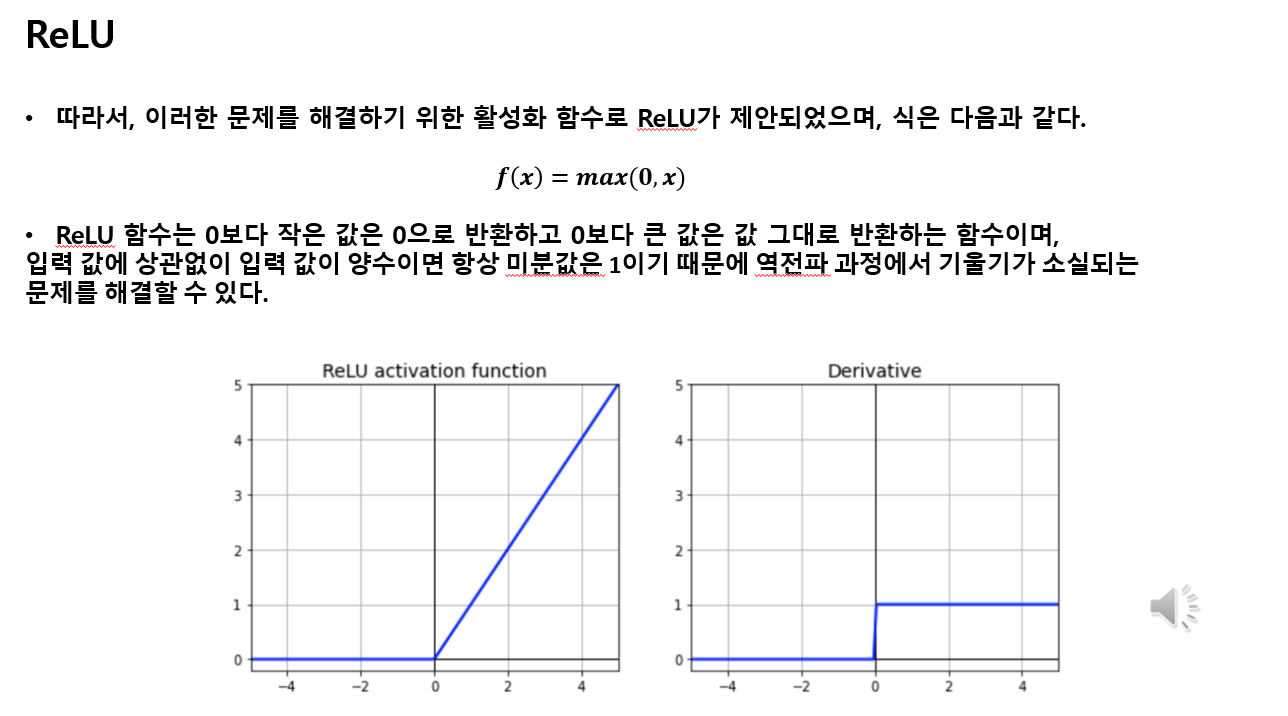

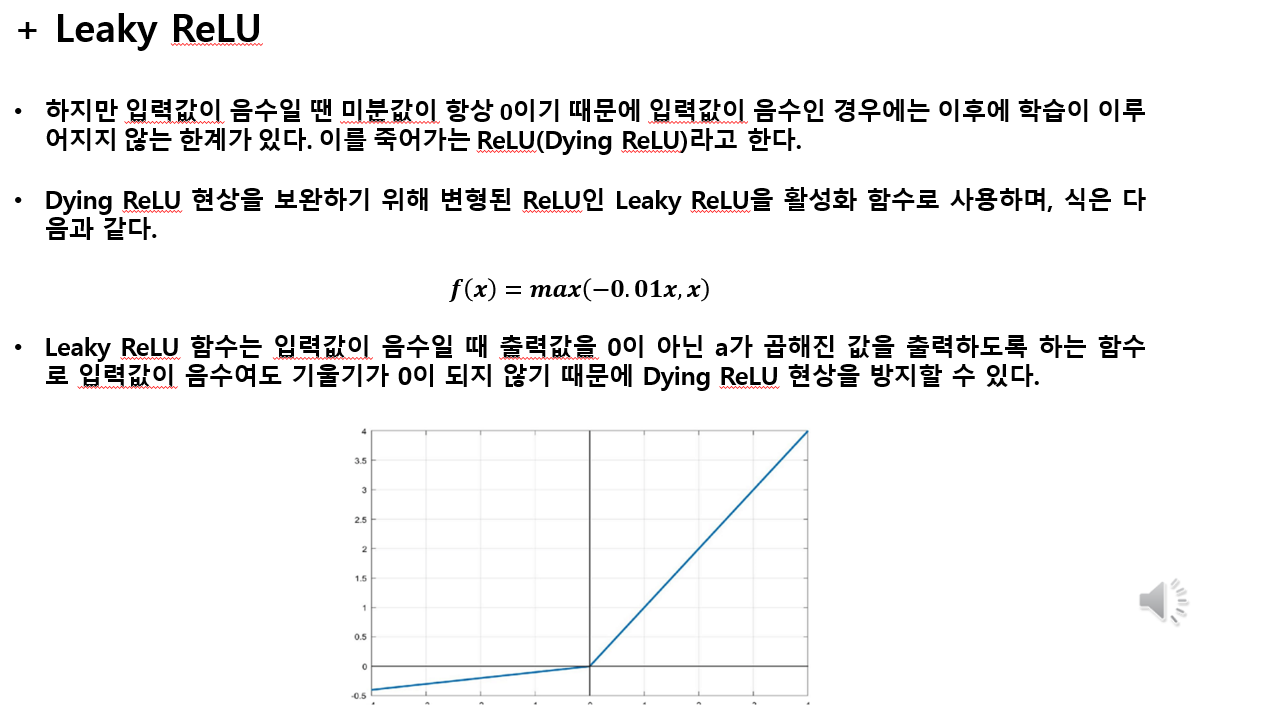

## Checkpoint function

## Data load & pre-processing function

In [21]:
def load_mnist() :
    (train_data, train_labels), (test_data, test_labels) = mnist.load_data()
    train_data = np.expand_dims(train_data, axis=-1) # [N, 28, 28] -> [N, 28, 28, 1]
    test_data = np.expand_dims(test_data, axis=-1) # [N, 28, 28] -> [N, 28, 28, 1]

    train_data, test_data = normalize(train_data, test_data)

    train_labels = to_categorical(train_labels, 10) # [N,] -> [N, 10]
    test_labels = to_categorical(test_labels, 10) # [N,] -> [N, 10]

    return train_data, train_labels, test_data, test_labels

def normalize(train_data, test_data):
    train_data = train_data.astype(np.float32) / 255.0
    test_data = test_data.astype(np.float32) / 255.0

    return train_data, test_data

## Performance function

In [22]:
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_pred=logits, y_true=labels, 
                                                                   from_logits=True))
    return loss

def accuracy_fn(model, images, labels):
    logits = model(images, training=False)
    prediction = tf.equal(tf.argmax(logits, -1), tf.argmax(labels, -1))
    accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))
    return accuracy

def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

## Model function

In [23]:
def flatten() :
    return tf.keras.layers.Flatten()

def dense(label_dim, weight_init) :
    return tf.keras.layers.Dense(units=label_dim, use_bias=True, kernel_initializer=weight_init)

def relu() :
    return tf.keras.layers.Activation(tf.keras.activations.relu)

## Create model (class version)

In [24]:
class create_model_class(tf.keras.Model):
    def __init__(self, label_dim):
        super(create_model_class, self).__init__()
        weight_init = tf.keras.initializers.RandomNormal()

        self.model = tf.keras.Sequential()
        self.model.add(flatten())

        for i in range(2):
            self.model.add(dense(256, weight_init))
            self.model.add(relu())

        self.model.add(dense(label_dim, weight_init))

    def call(self, x, training=None, mask=None):
        x = self.model(x)

        return x

## Create model (function version)

In [25]:
def create_model_function(label_dim) :
    weight_init = tf.keras.initializers.RandomNormal(seed=7)

    model = tf.keras.Sequential()
    model.add(flatten())

    for i in range(2) :
        model.add(dense(256, weight_init))
        model.add(relu())

    model.add(dense(label_dim, weight_init))

    return model

## Define data & hyper-parameter

In [26]:
""" dataset """
train_x, train_y, test_x, test_y = load_mnist()

""" parameters """
learning_rate = 0.001
batch_size = 128

training_epochs = 1
training_iterations = len(train_x) // batch_size

label_dim = 10

train_flag = True

""" Graph Input using Dataset API """
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=batch_size).\
    batch(batch_size, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=len(test_x)).\
    batch(len(test_x))

## Define model & optimizer & writer

In [27]:
""" Model """
network = create_model_function(label_dim)

""" Training """
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

""" Writer """
checkpoint_dir = 'checkpoints'
logs_dir = 'logs'

model_dir = 'nn_relu'

checkpoint_dir = os.path.join(checkpoint_dir, model_dir)
check_folder(checkpoint_dir)
checkpoint_prefix = os.path.join(checkpoint_dir, model_dir)
logs_dir = os.path.join(logs_dir, model_dir)

## Restore checkpoint & start train or test phase

In [28]:
if train_flag :

    checkpoint = tf.train.Checkpoint(dnn=network)

    # create writer for tensorboard
    summary_writer = tf.summary.create_file_writer(logdir=logs_dir)
    start_time = time()

    # restore check-point if it exits
    could_load, checkpoint_counter = load(network, checkpoint_dir)    

    if could_load:
        start_epoch = (int)(checkpoint_counter / training_iterations)        
        counter = checkpoint_counter        
        print(" [*] Load SUCCESS")
    else:
        start_epoch = 0
        start_iteration = 0
        counter = 0
        print(" [!] Load failed...")
    
    # train phase
    with summary_writer.as_default():  # for tensorboard
        for epoch in range(start_epoch, training_epochs):
            for idx, (train_input, train_label) in enumerate(train_dataset):                
                grads = grad(network, train_input, train_label)
                optimizer.apply_gradients(grads_and_vars=zip(grads, network.variables))

                train_loss = loss_fn(network, train_input, train_label)
                train_accuracy = accuracy_fn(network, train_input, train_label)

                for test_input, test_label in test_dataset:                
                    test_accuracy = accuracy_fn(network, test_input, test_label)

                tf.summary.scalar(name='train_loss', data=train_loss, step=counter)
                tf.summary.scalar(name='train_accuracy', data=train_accuracy, step=counter)
                tf.summary.scalar(name='test_accuracy', data=test_accuracy, step=counter)

                print(
                    "Epoch: [%2d] [%5d/%5d] time: %4.4f, train_loss: %.8f, train_accuracy: %.4f, test_Accuracy: %.4f" \
                    % (epoch, idx, training_iterations, time() - start_time, train_loss, train_accuracy,
                       test_accuracy))
                counter += 1
        checkpoint.save(file_prefix=checkpoint_prefix + '-{}'.format(counter))
        
# test phase      
else :
    _, _ = load(network, checkpoint_dir)
    for test_input, test_label in test_dataset:    
        test_accuracy = accuracy_fn(network, test_input, test_label)

    print("test_Accuracy: %.4f" % (test_accuracy))

 [*] Reading checkpoints...
 [*] Failed to find a checkpoint
 [!] Load failed...


C:\Users\wlghks\anaconda3\envs\ml_env\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch: [ 0] [    0/  468] time: 0.9555, train_loss: 2.19310212, train_accuracy: 0.3984, test_Accuracy: 0.2381
Epoch: [ 0] [    1/  468] time: 1.2379, train_loss: 2.13000202, train_accuracy: 0.5781, test_Accuracy: 0.4171
Epoch: [ 0] [    2/  468] time: 1.5024, train_loss: 2.09628391, train_accuracy: 0.4688, test_Accuracy: 0.5061
Epoch: [ 0] [    3/  468] time: 1.7773, train_loss: 1.98412752, train_accuracy: 0.5781, test_Accuracy: 0.5592
Epoch: [ 0] [    4/  468] time: 2.0273, train_loss: 1.93377399, train_accuracy: 0.6172, test_Accuracy: 0.6005
Epoch: [ 0] [    5/  468] time: 2.2873, train_loss: 1.83723032, train_accuracy: 0.6250, test_Accuracy: 0.6478
Epoch: [ 0] [    6/  468] time: 2.5539, train_loss: 1.76729071, train_accuracy: 0.6641, test_Accuracy: 0.6926
Epoch: [ 0] [    7/  468] time: 2.8218, train_loss: 1.56304669, train_accuracy: 0.7891, test_Accuracy: 0.7037
Epoch: [ 0] [    8/  468] time: 3.0926, train_loss: 1.54205000, train_accuracy: 0.6875, test_Accuracy: 0.7234
Epoch: [ 0

Epoch: [ 0] [  148/  468] time: 15.0268, train_loss: 0.21428855, train_accuracy: 0.9297, test_Accuracy: 0.9188
Epoch: [ 0] [  149/  468] time: 15.1395, train_loss: 0.27787650, train_accuracy: 0.9219, test_Accuracy: 0.9252
Epoch: [ 0] [  150/  468] time: 15.2402, train_loss: 0.24429613, train_accuracy: 0.9297, test_Accuracy: 0.9304
Epoch: [ 0] [  151/  468] time: 15.3290, train_loss: 0.29512709, train_accuracy: 0.9219, test_Accuracy: 0.9325
Epoch: [ 0] [  152/  468] time: 15.4198, train_loss: 0.20357569, train_accuracy: 0.9531, test_Accuracy: 0.9338
Epoch: [ 0] [  153/  468] time: 15.5185, train_loss: 0.23519652, train_accuracy: 0.9297, test_Accuracy: 0.9318
Epoch: [ 0] [  154/  468] time: 15.6092, train_loss: 0.24084970, train_accuracy: 0.9453, test_Accuracy: 0.9301
Epoch: [ 0] [  155/  468] time: 15.7000, train_loss: 0.26551920, train_accuracy: 0.8984, test_Accuracy: 0.9302
Epoch: [ 0] [  156/  468] time: 15.8007, train_loss: 0.16560951, train_accuracy: 0.9453, test_Accuracy: 0.9291
E

Epoch: [ 0] [  222/  468] time: 21.9862, train_loss: 0.14770129, train_accuracy: 0.9766, test_Accuracy: 0.9375
Epoch: [ 0] [  223/  468] time: 22.0829, train_loss: 0.15964259, train_accuracy: 0.9609, test_Accuracy: 0.9365
Epoch: [ 0] [  224/  468] time: 22.1757, train_loss: 0.13589758, train_accuracy: 0.9688, test_Accuracy: 0.9381
Epoch: [ 0] [  225/  468] time: 22.2714, train_loss: 0.22157961, train_accuracy: 0.9297, test_Accuracy: 0.9409
Epoch: [ 0] [  226/  468] time: 22.3612, train_loss: 0.16789612, train_accuracy: 0.9453, test_Accuracy: 0.9430
Epoch: [ 0] [  227/  468] time: 22.4579, train_loss: 0.11141416, train_accuracy: 0.9688, test_Accuracy: 0.9425
Epoch: [ 0] [  228/  468] time: 22.5487, train_loss: 0.19225821, train_accuracy: 0.9297, test_Accuracy: 0.9397
Epoch: [ 0] [  229/  468] time: 22.6384, train_loss: 0.19870700, train_accuracy: 0.9609, test_Accuracy: 0.9361
Epoch: [ 0] [  230/  468] time: 22.7322, train_loss: 0.21723767, train_accuracy: 0.9453, test_Accuracy: 0.9343
E

Epoch: [ 0] [  295/  468] time: 28.7700, train_loss: 0.18844877, train_accuracy: 0.9531, test_Accuracy: 0.9480
Epoch: [ 0] [  296/  468] time: 28.8678, train_loss: 0.21120790, train_accuracy: 0.9219, test_Accuracy: 0.9487
Epoch: [ 0] [  297/  468] time: 28.9685, train_loss: 0.13439815, train_accuracy: 0.9531, test_Accuracy: 0.9500
Epoch: [ 0] [  298/  468] time: 29.0593, train_loss: 0.25223160, train_accuracy: 0.9375, test_Accuracy: 0.9519
Epoch: [ 0] [  299/  468] time: 29.1500, train_loss: 0.17128967, train_accuracy: 0.9766, test_Accuracy: 0.9524
Epoch: [ 0] [  300/  468] time: 29.2458, train_loss: 0.16988248, train_accuracy: 0.9531, test_Accuracy: 0.9516
Epoch: [ 0] [  301/  468] time: 29.3375, train_loss: 0.14095615, train_accuracy: 0.9688, test_Accuracy: 0.9498
Epoch: [ 0] [  302/  468] time: 29.4293, train_loss: 0.16117337, train_accuracy: 0.9766, test_Accuracy: 0.9488
Epoch: [ 0] [  303/  468] time: 29.5190, train_loss: 0.25901479, train_accuracy: 0.9375, test_Accuracy: 0.9477
E

Epoch: [ 0] [  369/  468] time: 35.6477, train_loss: 0.06994383, train_accuracy: 0.9844, test_Accuracy: 0.9515
Epoch: [ 0] [  370/  468] time: 35.7424, train_loss: 0.16423221, train_accuracy: 0.9453, test_Accuracy: 0.9522
Epoch: [ 0] [  371/  468] time: 35.8322, train_loss: 0.17987835, train_accuracy: 0.9531, test_Accuracy: 0.9541
Epoch: [ 0] [  372/  468] time: 35.9299, train_loss: 0.09595641, train_accuracy: 0.9844, test_Accuracy: 0.9564
Epoch: [ 0] [  373/  468] time: 36.0286, train_loss: 0.18873084, train_accuracy: 0.9297, test_Accuracy: 0.9576
Epoch: [ 0] [  374/  468] time: 36.1184, train_loss: 0.15462543, train_accuracy: 0.9609, test_Accuracy: 0.9576
Epoch: [ 0] [  375/  468] time: 36.2082, train_loss: 0.15144393, train_accuracy: 0.9531, test_Accuracy: 0.9551
Epoch: [ 0] [  376/  468] time: 36.2989, train_loss: 0.15119438, train_accuracy: 0.9531, test_Accuracy: 0.9510
Epoch: [ 0] [  377/  468] time: 36.3937, train_loss: 0.12443941, train_accuracy: 0.9766, test_Accuracy: 0.9482
E

Epoch: [ 0] [  443/  468] time: 42.5173, train_loss: 0.14226022, train_accuracy: 0.9453, test_Accuracy: 0.9604
Epoch: [ 0] [  444/  468] time: 42.6090, train_loss: 0.08787997, train_accuracy: 0.9688, test_Accuracy: 0.9555
Epoch: [ 0] [  445/  468] time: 42.6978, train_loss: 0.12726405, train_accuracy: 0.9375, test_Accuracy: 0.9529
Epoch: [ 0] [  446/  468] time: 42.7905, train_loss: 0.09517679, train_accuracy: 0.9688, test_Accuracy: 0.9526
Epoch: [ 0] [  447/  468] time: 42.8843, train_loss: 0.20261770, train_accuracy: 0.9375, test_Accuracy: 0.9523
Epoch: [ 0] [  448/  468] time: 42.9771, train_loss: 0.08600446, train_accuracy: 0.9766, test_Accuracy: 0.9539
Epoch: [ 0] [  449/  468] time: 43.0678, train_loss: 0.11722119, train_accuracy: 0.9766, test_Accuracy: 0.9578
Epoch: [ 0] [  450/  468] time: 43.1705, train_loss: 0.23034823, train_accuracy: 0.9375, test_Accuracy: 0.9588
Epoch: [ 0] [  451/  468] time: 43.2673, train_loss: 0.10036685, train_accuracy: 0.9766, test_Accuracy: 0.9589
E

## Test accuracy : 96.22 %

# lab-10-2-1-mnist_nn_xavier

## Checkpoint function

In [38]:
def load(model, checkpoint_dir):
    print(" [*] Reading checkpoints...")

    ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
    if ckpt :
        ckpt_name = os.path.basename(ckpt.model_checkpoint_path)
        checkpoint = tf.train.Checkpoint(dnn=model)
        checkpoint.restore(save_path=os.path.join(checkpoint_dir, ckpt_name))
        counter = int(ckpt_name.split('-')[1])
        print(" [*] Success to read {}".format(ckpt_name))
        return True, counter
    else:
        print(" [*] Failed to find a checkpoint")
        return False, 0

def check_folder(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)
    return dir

## Data load & pre-processing function

In [39]:
def load_mnist() :
    (train_data, train_labels), (test_data, test_labels) = mnist.load_data()
    train_data = np.expand_dims(train_data, axis=-1) # [N, 28, 28] -> [N, 28, 28, 1]
    test_data = np.expand_dims(test_data, axis=-1) # [N, 28, 28] -> [N, 28, 28, 1]

    train_data, test_data = normalize(train_data, test_data)

    train_labels = to_categorical(train_labels, 10) # [N,] -> [N, 10]
    test_labels = to_categorical(test_labels, 10) # [N,] -> [N, 10]

    return train_data, train_labels, test_data, test_labels

def normalize(train_data, test_data):
    train_data = train_data.astype(np.float32) / 255.0
    test_data = test_data.astype(np.float32) / 255.0

    return train_data, test_data

## Performance function

In [40]:
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_pred=logits, y_true=labels, 
                                                                   from_logits=True))
    return loss

def accuracy_fn(model, images, labels):
    logits = model(images, training=False)
    prediction = tf.equal(tf.argmax(logits, -1), tf.argmax(labels, -1))
    accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))
    return accuracy

def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

## Model function

In [41]:
def flatten() :
    return tf.keras.layers.Flatten()

def dense(label_dim, weight_init) :
    return tf.keras.layers.Dense(units=label_dim, use_bias=True, kernel_initializer=weight_init)

def relu() :
    return tf.keras.layers.Activation(tf.keras.activations.relu)

## Create model (class version)

In [42]:
class create_model_class(tf.keras.Model):
    def __init__(self, label_dim):
        super(create_model_class, self).__init__()
        weight_init = tf.keras.initializers.glorot_uniform(seed=7)

        self.model = tf.keras.Sequential()
        self.model.add(flatten())

        for i in range(2):
            self.model.add(dense(256, weight_init))
            self.model.add(relu())

        self.model.add(dense(label_dim, weight_init))

    def call(self, x, training=None, mask=None):

        x = self.model(x)

        return x

## Create model (function version)

In [43]:
def create_model_function(label_dim) :
    weight_init = tf.keras.initializers.glorot_uniform(seed=7)

    model = tf.keras.Sequential()
    model.add(flatten())

    for i in range(2) :
        model.add(dense(256, weight_init))
        model.add(relu())

    model.add(dense(label_dim, weight_init))

    return model

## Define data & hyper-parameter

In [44]:
""" dataset """
train_x, train_y, test_x, test_y = load_mnist()

""" parameters """
learning_rate = 0.001
batch_size = 128

training_epochs = 1
training_iterations = len(train_x) // batch_size

label_dim = 10

train_flag = True

""" Graph Input using Dataset API """
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=batch_size).\
    batch(batch_size, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=len(test_x)).\
    batch(len(test_x))

## Define model & optimizer & writer

In [45]:
""" Model """
network = create_model_function(label_dim)

""" Training """
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

""" Writer """
checkpoint_dir = 'checkpoints'
logs_dir = 'logs'

model_dir = 'nn_xavier'

checkpoint_dir = os.path.join(checkpoint_dir, model_dir)
check_folder(checkpoint_dir)
checkpoint_prefix = os.path.join(checkpoint_dir, model_dir)
logs_dir = os.path.join(logs_dir, model_dir)

## Restore checkpoint & start train or test phase

In [46]:
if train_flag :

    checkpoint = tf.train.Checkpoint(dnn=network)

    # create writer for tensorboard
    summary_writer = tf.summary.create_file_writer(logdir=logs_dir)
    start_time = time()

    # restore check-point if it exits
    could_load, checkpoint_counter = load(network, checkpoint_dir)    

    if could_load:
        start_epoch = (int)(checkpoint_counter / training_iterations)        
        counter = checkpoint_counter        
        print(" [*] Load SUCCESS")
    else:
        start_epoch = 0
        start_iteration = 0
        counter = 0
        print(" [!] Load failed...")
    
    # train phase
    with summary_writer.as_default():  # for tensorboard
        for epoch in range(start_epoch, training_epochs):
            for idx, (train_input, train_label) in enumerate(train_dataset):                
                grads = grad(network, train_input, train_label)
                optimizer.apply_gradients(grads_and_vars=zip(grads, network.variables))

                train_loss = loss_fn(network, train_input, train_label)
                train_accuracy = accuracy_fn(network, train_input, train_label)

                for test_input, test_label in test_dataset:                
                    test_accuracy = accuracy_fn(network, test_input, test_label)

                tf.summary.scalar(name='train_loss', data=train_loss, step=counter)
                tf.summary.scalar(name='train_accuracy', data=train_accuracy, step=counter)
                tf.summary.scalar(name='test_accuracy', data=test_accuracy, step=counter)

                print(
                    "Epoch: [%2d] [%5d/%5d] time: %4.4f, train_loss: %.8f, train_accuracy: %.4f, test_Accuracy: %.4f" \
                    % (epoch, idx, training_iterations, time() - start_time, train_loss, train_accuracy,
                       test_accuracy))
                counter += 1
        checkpoint.save(file_prefix=checkpoint_prefix + '-{}'.format(counter))
        
# test phase      
else :
    _, _ = load(network, checkpoint_dir)
    for test_input, test_label in test_dataset:    
        test_accuracy = accuracy_fn(network, test_input, test_label)

    print("test_Accuracy: %.4f" % (test_accuracy))

 [*] Reading checkpoints...
 [*] Failed to find a checkpoint
 [!] Load failed...
Epoch: [ 0] [    0/  468] time: 0.9038, train_loss: 2.08663678, train_accuracy: 0.4609, test_Accuracy: 0.2670
Epoch: [ 0] [    1/  468] time: 1.1739, train_loss: 2.00325489, train_accuracy: 0.4922, test_Accuracy: 0.4200
Epoch: [ 0] [    2/  468] time: 1.4382, train_loss: 1.88652802, train_accuracy: 0.5859, test_Accuracy: 0.5458
Epoch: [ 0] [    3/  468] time: 1.7035, train_loss: 1.78545642, train_accuracy: 0.5781, test_Accuracy: 0.6047
Epoch: [ 0] [    4/  468] time: 1.9764, train_loss: 1.67002141, train_accuracy: 0.6016, test_Accuracy: 0.6539
Epoch: [ 0] [    5/  468] time: 2.2566, train_loss: 1.55159879, train_accuracy: 0.6719, test_Accuracy: 0.6793
Epoch: [ 0] [    6/  468] time: 2.5318, train_loss: 1.36020112, train_accuracy: 0.7188, test_Accuracy: 0.6927
Epoch: [ 0] [    7/  468] time: 2.8035, train_loss: 1.26723778, train_accuracy: 0.7266, test_Accuracy: 0.6960
Epoch: [ 0] [    8/  468] time: 3.0721,

Epoch: [ 0] [  220/  468] time: 22.0121, train_loss: 0.15021566, train_accuracy: 0.9453, test_Accuracy: 0.9487
Epoch: [ 0] [  221/  468] time: 22.1059, train_loss: 0.14001358, train_accuracy: 0.9531, test_Accuracy: 0.9483
Epoch: [ 0] [  222/  468] time: 22.2016, train_loss: 0.16364977, train_accuracy: 0.9688, test_Accuracy: 0.9483
Epoch: [ 0] [  223/  468] time: 22.3004, train_loss: 0.15483142, train_accuracy: 0.9609, test_Accuracy: 0.9498
Epoch: [ 0] [  224/  468] time: 22.3871, train_loss: 0.14527152, train_accuracy: 0.9688, test_Accuracy: 0.9510
Epoch: [ 0] [  225/  468] time: 22.4789, train_loss: 0.15231481, train_accuracy: 0.9453, test_Accuracy: 0.9505
Epoch: [ 0] [  226/  468] time: 22.5726, train_loss: 0.18411502, train_accuracy: 0.9531, test_Accuracy: 0.9497
Epoch: [ 0] [  227/  468] time: 22.6694, train_loss: 0.19527541, train_accuracy: 0.9609, test_Accuracy: 0.9488
Epoch: [ 0] [  228/  468] time: 22.7601, train_loss: 0.15220648, train_accuracy: 0.9531, test_Accuracy: 0.9471
E

Epoch: [ 0] [  293/  468] time: 28.8808, train_loss: 0.21359704, train_accuracy: 0.9375, test_Accuracy: 0.9539
Epoch: [ 0] [  294/  468] time: 28.9735, train_loss: 0.13582093, train_accuracy: 0.9688, test_Accuracy: 0.9493
Epoch: [ 0] [  295/  468] time: 29.0702, train_loss: 0.25662029, train_accuracy: 0.9375, test_Accuracy: 0.9471
Epoch: [ 0] [  296/  468] time: 29.1760, train_loss: 0.15638120, train_accuracy: 0.9531, test_Accuracy: 0.9468
Epoch: [ 0] [  297/  468] time: 29.2677, train_loss: 0.15583412, train_accuracy: 0.9688, test_Accuracy: 0.9491
Epoch: [ 0] [  298/  468] time: 29.3605, train_loss: 0.13568136, train_accuracy: 0.9609, test_Accuracy: 0.9516
Epoch: [ 0] [  299/  468] time: 29.4552, train_loss: 0.28368074, train_accuracy: 0.9453, test_Accuracy: 0.9541
Epoch: [ 0] [  300/  468] time: 29.5530, train_loss: 0.10468358, train_accuracy: 0.9688, test_Accuracy: 0.9566
Epoch: [ 0] [  301/  468] time: 29.6487, train_loss: 0.23490012, train_accuracy: 0.9219, test_Accuracy: 0.9585
E

Epoch: [ 0] [  367/  468] time: 35.8212, train_loss: 0.11155874, train_accuracy: 0.9531, test_Accuracy: 0.9503
Epoch: [ 0] [  368/  468] time: 35.9229, train_loss: 0.15319988, train_accuracy: 0.9688, test_Accuracy: 0.9445
Epoch: [ 0] [  369/  468] time: 36.0147, train_loss: 0.13970019, train_accuracy: 0.9453, test_Accuracy: 0.9455
Epoch: [ 0] [  370/  468] time: 36.1094, train_loss: 0.20020905, train_accuracy: 0.9375, test_Accuracy: 0.9522
Epoch: [ 0] [  371/  468] time: 36.2002, train_loss: 0.19374210, train_accuracy: 0.9375, test_Accuracy: 0.9555
Epoch: [ 0] [  372/  468] time: 36.2929, train_loss: 0.18781735, train_accuracy: 0.9141, test_Accuracy: 0.9554
Epoch: [ 0] [  373/  468] time: 36.3867, train_loss: 0.13122033, train_accuracy: 0.9531, test_Accuracy: 0.9546
Epoch: [ 0] [  374/  468] time: 36.4794, train_loss: 0.13437997, train_accuracy: 0.9688, test_Accuracy: 0.9525
Epoch: [ 0] [  375/  468] time: 36.5782, train_loss: 0.08651699, train_accuracy: 0.9766, test_Accuracy: 0.9533
E

Epoch: [ 0] [  441/  468] time: 42.6848, train_loss: 0.09820770, train_accuracy: 0.9766, test_Accuracy: 0.9629
Epoch: [ 0] [  442/  468] time: 42.7746, train_loss: 0.04165828, train_accuracy: 1.0000, test_Accuracy: 0.9628
Epoch: [ 0] [  443/  468] time: 42.8673, train_loss: 0.11949582, train_accuracy: 0.9688, test_Accuracy: 0.9616
Epoch: [ 0] [  444/  468] time: 42.9581, train_loss: 0.03453850, train_accuracy: 0.9922, test_Accuracy: 0.9613
Epoch: [ 0] [  445/  468] time: 43.0469, train_loss: 0.21163216, train_accuracy: 0.9453, test_Accuracy: 0.9614
Epoch: [ 0] [  446/  468] time: 43.1376, train_loss: 0.13312984, train_accuracy: 0.9688, test_Accuracy: 0.9621
Epoch: [ 0] [  447/  468] time: 43.2314, train_loss: 0.15779206, train_accuracy: 0.9297, test_Accuracy: 0.9646
Epoch: [ 0] [  448/  468] time: 43.3181, train_loss: 0.06806149, train_accuracy: 0.9844, test_Accuracy: 0.9648
Epoch: [ 0] [  449/  468] time: 43.4209, train_loss: 0.08039498, train_accuracy: 0.9766, test_Accuracy: 0.9647
E

## Test accuracy : 96.55 %

# lab-10-2-2-mnist_nn_deep

## Xavier Deep network version

## Checkpoint function

In [47]:
def load(model, checkpoint_dir):
    print(" [*] Reading checkpoints...")

    ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
    if ckpt :
        ckpt_name = os.path.basename(ckpt.model_checkpoint_path)
        checkpoint = tf.train.Checkpoint(dnn=model)
        checkpoint.restore(save_path=os.path.join(checkpoint_dir, ckpt_name))
        counter = int(ckpt_name.split('-')[1])
        print(" [*] Success to read {}".format(ckpt_name))
        return True, counter
    else:
        print(" [*] Failed to find a checkpoint")
        return False, 0

def check_folder(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)
    return dir

## Data load & pre-processing function

In [48]:
def load_mnist() :
    (train_data, train_labels), (test_data, test_labels) = mnist.load_data()
    train_data = np.expand_dims(train_data, axis=-1) # [N, 28, 28] -> [N, 28, 28, 1]
    test_data = np.expand_dims(test_data, axis=-1) # [N, 28, 28] -> [N, 28, 28, 1]

    train_data, test_data = normalize(train_data, test_data)

    train_labels = to_categorical(train_labels, 10) # [N,] -> [N, 10]
    test_labels = to_categorical(test_labels, 10) # [N,] -> [N, 10]

    return train_data, train_labels, test_data, test_labels

def normalize(train_data, test_data):
    train_data = train_data.astype(np.float32) / 255.0
    test_data = test_data.astype(np.float32) / 255.0

    return train_data, test_data

## Performance function

In [49]:
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_pred=logits, y_true=labels, 
                                                                   from_logits=True))
    return loss

def accuracy_fn(model, images, labels):
    logits = model(images, training=False)
    prediction = tf.equal(tf.argmax(logits, -1), tf.argmax(labels, -1))
    accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))
    return accuracy

def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

## Model function

In [50]:
def flatten() :
    return tf.keras.layers.Flatten()

def dense(label_dim, weight_init) :
    return tf.keras.layers.Dense(units=label_dim, use_bias=True, kernel_initializer=weight_init)

def relu() :
    return tf.keras.layers.Activation(tf.keras.activations.relu)

## Create model (class version)

In [51]:
class create_model_class(tf.keras.Model):
    def __init__(self, label_dim):
        super(create_model_class, self).__init__()
        weight_init = tf.keras.initializers.glorot_uniform(seed=7)

        self.model = tf.keras.Sequential()
        self.model.add(flatten())

        for i in range(4):
            self.model.add(dense(512, weight_init))
            self.model.add(relu())

        self.model.add(dense(label_dim, weight_init))

    def call(self, x, training=None, mask=None):

        x = self.model(x)

        return x

## Create model (function version)

In [52]:
def create_model_function(label_dim) :
    weight_init = tf.keras.initializers.glorot_uniform(seed=7)

    model = tf.keras.Sequential()
    model.add(flatten())

    for i in range(4) :
        model.add(dense(512, weight_init))
        model.add(relu())

    model.add(dense(label_dim, weight_init))

    return model

## Define data & hyper-parameter

In [54]:
""" dataset """
train_x, train_y, test_x, test_y = load_mnist()

""" parameters """
learning_rate = 0.001
batch_size = 128

training_epochs = 1
training_iterations = len(train_x) // batch_size

label_dim = 10

train_flag = True

""" Graph Input using Dataset API """
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=batch_size).\
    batch(batch_size, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=len(test_x)).\
    batch(len(test_x))

## Define model & optimizer & writer

In [55]:
""" Model """
network = create_model_function(label_dim)

""" Training """
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

""" Writer """
checkpoint_dir = 'checkpoints'
logs_dir = 'logs'

model_dir = 'nn_deep'

checkpoint_dir = os.path.join(checkpoint_dir, model_dir)
check_folder(checkpoint_dir)
checkpoint_prefix = os.path.join(checkpoint_dir, model_dir)
logs_dir = os.path.join(logs_dir, model_dir)

## Restore checkpoint & start train or test phase

In [56]:
if train_flag :

    checkpoint = tf.train.Checkpoint(dnn=network)

    # create writer for tensorboard
    summary_writer = tf.summary.create_file_writer(logdir=logs_dir)
    start_time = time()

    # restore check-point if it exits
    could_load, checkpoint_counter = load(network, checkpoint_dir)    

    if could_load:
        start_epoch = (int)(checkpoint_counter / training_iterations)        
        counter = checkpoint_counter        
        print(" [*] Load SUCCESS")
    else:
        start_epoch = 0
        start_iteration = 0
        counter = 0
        print(" [!] Load failed...")
    
    # train phase
    with summary_writer.as_default():  # for tensorboard
        for epoch in range(start_epoch, training_epochs):
            for idx, (train_input, train_label) in enumerate(train_dataset):            
                grads = grad(network, train_input, train_label)
                optimizer.apply_gradients(grads_and_vars=zip(grads, network.variables))

                train_loss = loss_fn(network, train_input, train_label)
                train_accuracy = accuracy_fn(network, train_input, train_label)
                
                for test_input, test_label in test_dataset:                
                    test_accuracy = accuracy_fn(network, test_input, test_label)

                tf.summary.scalar(name='train_loss', data=train_loss, step=counter)
                tf.summary.scalar(name='train_accuracy', data=train_accuracy, step=counter)
                tf.summary.scalar(name='test_accuracy', data=test_accuracy, step=counter)

                print(
                    "Epoch: [%2d] [%5d/%5d] time: %4.4f, train_loss: %.8f, train_accuracy: %.4f, test_Accuracy: %.4f" \
                    % (epoch, idx, training_iterations, time() - start_time, train_loss, train_accuracy,
                       test_accuracy))
                counter += 1                
        checkpoint.save(file_prefix=checkpoint_prefix + '-{}'.format(counter))
        
# test phase      
else :
    _, _ = load(network, checkpoint_dir)
    for test_input, test_label in test_dataset:    
        test_accuracy = accuracy_fn(network, test_input, test_label)

    print("test_Accuracy: %.4f" % (test_accuracy))

 [*] Reading checkpoints...
 [*] Failed to find a checkpoint
 [!] Load failed...
Epoch: [ 0] [    0/  468] time: 0.6939, train_loss: 2.04661584, train_accuracy: 0.2734, test_Accuracy: 0.1814
Epoch: [ 0] [    1/  468] time: 1.0077, train_loss: 1.94149244, train_accuracy: 0.4453, test_Accuracy: 0.3478
Epoch: [ 0] [    2/  468] time: 1.2836, train_loss: 1.81697488, train_accuracy: 0.7266, test_Accuracy: 0.6613
Epoch: [ 0] [    3/  468] time: 1.5979, train_loss: 1.47914910, train_accuracy: 0.6953, test_Accuracy: 0.6068
Epoch: [ 0] [    4/  468] time: 1.9231, train_loss: 1.16173792, train_accuracy: 0.6719, test_Accuracy: 0.6427
Epoch: [ 0] [    5/  468] time: 2.2279, train_loss: 1.02531743, train_accuracy: 0.7500, test_Accuracy: 0.7280
Epoch: [ 0] [    6/  468] time: 2.5373, train_loss: 0.92183328, train_accuracy: 0.7422, test_Accuracy: 0.7641
Epoch: [ 0] [    7/  468] time: 2.8652, train_loss: 0.84369707, train_accuracy: 0.8203, test_Accuracy: 0.8087
Epoch: [ 0] [    8/  468] time: 3.1676,

Epoch: [ 0] [  148/  468] time: 16.0571, train_loss: 0.15168709, train_accuracy: 0.9531, test_Accuracy: 0.9447
Epoch: [ 0] [  149/  468] time: 16.1578, train_loss: 0.18956207, train_accuracy: 0.9219, test_Accuracy: 0.9478
Epoch: [ 0] [  150/  468] time: 16.2635, train_loss: 0.14362098, train_accuracy: 0.9688, test_Accuracy: 0.9476
Epoch: [ 0] [  151/  468] time: 16.3662, train_loss: 0.18111187, train_accuracy: 0.9609, test_Accuracy: 0.9461
Epoch: [ 0] [  152/  468] time: 16.4660, train_loss: 0.21980138, train_accuracy: 0.9375, test_Accuracy: 0.9451
Epoch: [ 0] [  153/  468] time: 16.5767, train_loss: 0.22508705, train_accuracy: 0.9297, test_Accuracy: 0.9466
Epoch: [ 0] [  154/  468] time: 16.6794, train_loss: 0.08678500, train_accuracy: 0.9766, test_Accuracy: 0.9507
Epoch: [ 0] [  155/  468] time: 16.7771, train_loss: 0.09363004, train_accuracy: 0.9844, test_Accuracy: 0.9505
Epoch: [ 0] [  156/  468] time: 16.8759, train_loss: 0.07665386, train_accuracy: 0.9766, test_Accuracy: 0.9470
E

Epoch: [ 0] [  222/  468] time: 23.5680, train_loss: 0.18299522, train_accuracy: 0.9375, test_Accuracy: 0.9569
Epoch: [ 0] [  223/  468] time: 23.6747, train_loss: 0.13780501, train_accuracy: 0.9844, test_Accuracy: 0.9560
Epoch: [ 0] [  224/  468] time: 23.7784, train_loss: 0.10430688, train_accuracy: 0.9844, test_Accuracy: 0.9468
Epoch: [ 0] [  225/  468] time: 23.8791, train_loss: 0.14654604, train_accuracy: 0.9453, test_Accuracy: 0.9385
Epoch: [ 0] [  226/  468] time: 23.9829, train_loss: 0.12154939, train_accuracy: 0.9609, test_Accuracy: 0.9457
Epoch: [ 0] [  227/  468] time: 24.0866, train_loss: 0.12093730, train_accuracy: 0.9609, test_Accuracy: 0.9527
Epoch: [ 0] [  228/  468] time: 24.1833, train_loss: 0.12300019, train_accuracy: 0.9531, test_Accuracy: 0.9559
Epoch: [ 0] [  229/  468] time: 24.2870, train_loss: 0.20082851, train_accuracy: 0.9375, test_Accuracy: 0.9530
Epoch: [ 0] [  230/  468] time: 24.3888, train_loss: 0.11232708, train_accuracy: 0.9688, test_Accuracy: 0.9455
E

Epoch: [ 0] [  297/  468] time: 31.1976, train_loss: 0.10694516, train_accuracy: 0.9609, test_Accuracy: 0.9608
Epoch: [ 0] [  298/  468] time: 31.3013, train_loss: 0.08464111, train_accuracy: 0.9766, test_Accuracy: 0.9589
Epoch: [ 0] [  299/  468] time: 31.4070, train_loss: 0.05673713, train_accuracy: 0.9844, test_Accuracy: 0.9559
Epoch: [ 0] [  300/  468] time: 31.5257, train_loss: 0.08968344, train_accuracy: 0.9766, test_Accuracy: 0.9552
Epoch: [ 0] [  301/  468] time: 31.6344, train_loss: 0.11012803, train_accuracy: 0.9688, test_Accuracy: 0.9558
Epoch: [ 0] [  302/  468] time: 31.7381, train_loss: 0.11364745, train_accuracy: 0.9609, test_Accuracy: 0.9580
Epoch: [ 0] [  303/  468] time: 31.8428, train_loss: 0.06508617, train_accuracy: 0.9766, test_Accuracy: 0.9600
Epoch: [ 0] [  304/  468] time: 31.9515, train_loss: 0.08531612, train_accuracy: 0.9688, test_Accuracy: 0.9583
Epoch: [ 0] [  305/  468] time: 32.0473, train_loss: 0.07109861, train_accuracy: 0.9766, test_Accuracy: 0.9543
E

Epoch: [ 0] [  371/  468] time: 38.6915, train_loss: 0.14539418, train_accuracy: 0.9531, test_Accuracy: 0.9617
Epoch: [ 0] [  372/  468] time: 38.7952, train_loss: 0.08836203, train_accuracy: 0.9766, test_Accuracy: 0.9630
Epoch: [ 0] [  373/  468] time: 38.8980, train_loss: 0.10843980, train_accuracy: 0.9844, test_Accuracy: 0.9645
Epoch: [ 0] [  374/  468] time: 38.9967, train_loss: 0.05740925, train_accuracy: 0.9844, test_Accuracy: 0.9658
Epoch: [ 0] [  375/  468] time: 39.0984, train_loss: 0.07275130, train_accuracy: 0.9766, test_Accuracy: 0.9660
Epoch: [ 0] [  376/  468] time: 39.2002, train_loss: 0.04190675, train_accuracy: 0.9922, test_Accuracy: 0.9658
Epoch: [ 0] [  377/  468] time: 39.3019, train_loss: 0.03691491, train_accuracy: 1.0000, test_Accuracy: 0.9641
Epoch: [ 0] [  378/  468] time: 39.4006, train_loss: 0.04690970, train_accuracy: 0.9922, test_Accuracy: 0.9626
Epoch: [ 0] [  379/  468] time: 39.4964, train_loss: 0.13970774, train_accuracy: 0.9609, test_Accuracy: 0.9631
E

Epoch: [ 0] [  446/  468] time: 46.1964, train_loss: 0.07705867, train_accuracy: 0.9922, test_Accuracy: 0.9637
Epoch: [ 0] [  447/  468] time: 46.2992, train_loss: 0.07447495, train_accuracy: 0.9766, test_Accuracy: 0.9622
Epoch: [ 0] [  448/  468] time: 46.3989, train_loss: 0.04013775, train_accuracy: 0.9922, test_Accuracy: 0.9609
Epoch: [ 0] [  449/  468] time: 46.4986, train_loss: 0.05359505, train_accuracy: 0.9766, test_Accuracy: 0.9631
Epoch: [ 0] [  450/  468] time: 46.5994, train_loss: 0.04226441, train_accuracy: 0.9766, test_Accuracy: 0.9659
Epoch: [ 0] [  451/  468] time: 46.6971, train_loss: 0.05405059, train_accuracy: 0.9844, test_Accuracy: 0.9649
Epoch: [ 0] [  452/  468] time: 46.7928, train_loss: 0.03961316, train_accuracy: 0.9844, test_Accuracy: 0.9653
Epoch: [ 0] [  453/  468] time: 46.8926, train_loss: 0.10678113, train_accuracy: 0.9766, test_Accuracy: 0.9652
Epoch: [ 0] [  454/  468] time: 47.0013, train_loss: 0.06582948, train_accuracy: 0.9688, test_Accuracy: 0.9644
E

## Test accuracy : 96.88 %

# lab-10-3-mnist_nn_dropout

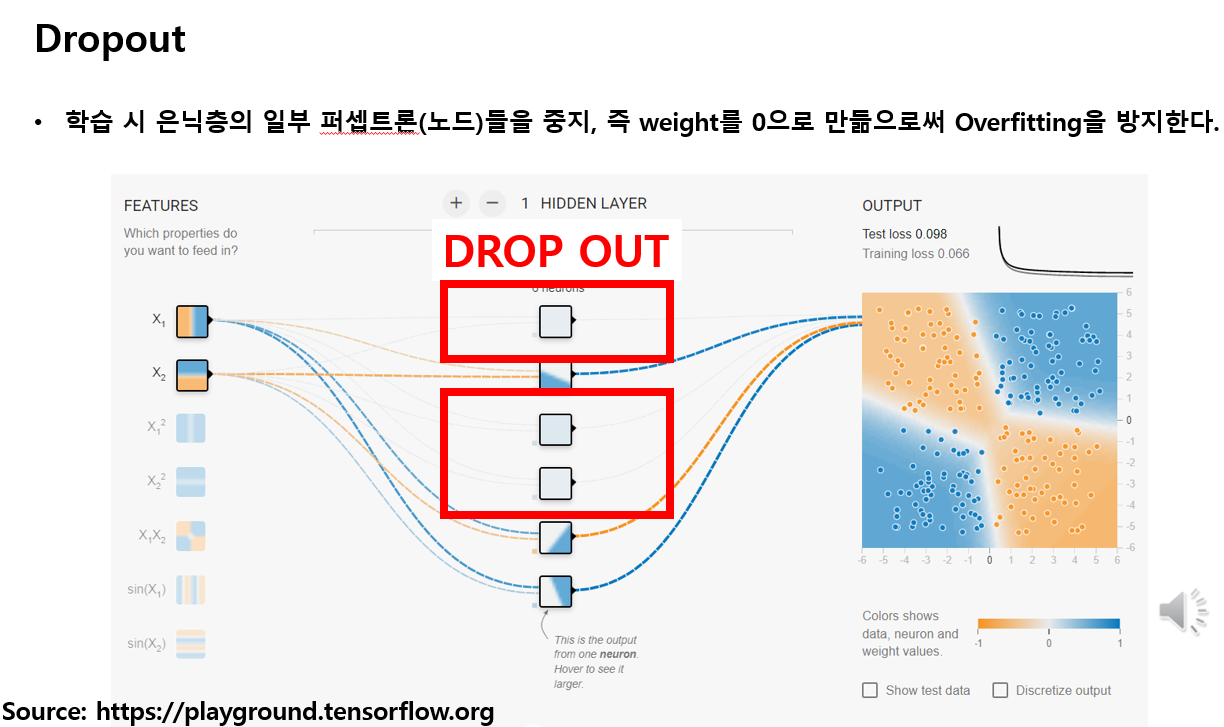

## Checkpoint function

In [88]:
def load(model, checkpoint_dir):
    print(" [*] Reading checkpoints...")

    ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
    if ckpt :
        ckpt_name = os.path.basename(ckpt.model_checkpoint_path)
        checkpoint = tf.train.Checkpoint(dnn=model)
        checkpoint.restore(save_path=os.path.join(checkpoint_dir, ckpt_name))
        counter = int(ckpt_name.split('-')[1])
        print(" [*] Success to read {}".format(ckpt_name))
        return True, counter
    else:
        print(" [*] Failed to find a checkpoint")
        return False, 0

def check_folder(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)
    return dir

## Data load & pre-processing function

In [89]:
def load_mnist() :
    (train_data, train_labels), (test_data, test_labels) = mnist.load_data()
    train_data = np.expand_dims(train_data, axis=-1) # [N, 28, 28] -> [N, 28, 28, 1]
    test_data = np.expand_dims(test_data, axis=-1) # [N, 28, 28] -> [N, 28, 28, 1]

    train_data, test_data = normalize(train_data, test_data)

    train_labels = to_categorical(train_labels, 10) # [N,] -> [N, 10]
    test_labels = to_categorical(test_labels, 10) # [N,] -> [N, 10]

    return train_data, train_labels, test_data, test_labels

def normalize(train_data, test_data):
    train_data = train_data.astype(np.float32) / 255.0
    test_data = test_data.astype(np.float32) / 255.0

    return train_data, test_data

## Performance function

In [90]:
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_pred=logits, y_true=labels, 
                                                                   from_logits=True))
    return loss

def accuracy_fn(model, images, labels):
    logits = model(images, training=False)
    prediction = tf.equal(tf.argmax(logits, -1), tf.argmax(labels, -1))
    accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))
    return accuracy

def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

## Model function

In [91]:
def flatten() :
    return tf.keras.layers.Flatten()

def dense(label_dim, weight_init) :
    return tf.keras.layers.Dense(units=label_dim, use_bias=True, kernel_initializer=weight_init)

def relu() :
    return tf.keras.layers.Activation(tf.keras.activations.relu)

def dropout(rate) :
    return tf.keras.layers.Dropout(rate)

## Create model (class version)

In [92]:
class create_model_class(tf.keras.Model):
    def __init__(self, label_dim):
        super(create_model_class, self).__init__()
        weight_init = tf.keras.initializers.glorot_uniform()

        self.model = tf.keras.Sequential()
        self.model.add(flatten())

        for i in range(4):
            self.model.add(dense(512, weight_init))
            self.model.add(relu())
            self.model.add(dropout(rate=0.5))

        self.model.add(dense(label_dim, weight_init))

    def call(self, x, training=None, mask=None):

        x = self.model(x)

        return x

## Create model (function version)

In [93]:
def create_model_function(label_dim) :
    weight_init = tf.keras.initializers.glorot_uniform()

    model = tf.keras.Sequential()
    model.add(flatten())

    for i in range(4) :
        model.add(dense(512, weight_init))
        model.add(relu())
        model.add(dropout(rate=0.5))

    model.add(dense(label_dim, weight_init))

    return model

## Define data & hyper-parameter

In [94]:
""" dataset """
train_x, train_y, test_x, test_y = load_mnist()

""" parameters """
learning_rate = 0.001
batch_size = 128

training_epochs = 1
training_iterations = len(train_x) // batch_size

label_dim = 10

train_flag = True

""" Graph Input using Dataset API """
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=batch_size).\
    batch(batch_size, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=len(test_x)).\
    batch(len(test_x))

## Define model & optimizer & writer

In [95]:
""" Model """
network = create_model_function(label_dim)

""" Training """
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

""" Writer """
checkpoint_dir = 'checkpoints'
logs_dir = 'logs'

model_dir = 'nn_dropout'

checkpoint_dir = os.path.join(checkpoint_dir, model_dir)
check_folder(checkpoint_dir)
checkpoint_prefix = os.path.join(checkpoint_dir, model_dir)
logs_dir = os.path.join(logs_dir, model_dir)

## Restore checkpoint & start train or test phase

In [96]:
if train_flag :

    checkpoint = tf.train.Checkpoint(dnn=network)

    # create writer for tensorboard
    summary_writer = tf.summary.create_file_writer(logdir=logs_dir)
    start_time = time()

    # restore check-point if it exits
    could_load, checkpoint_counter = load(network, checkpoint_dir)    

    if could_load:
        start_epoch = (int)(checkpoint_counter / training_iterations)        
        counter = checkpoint_counter        
        print(" [*] Load SUCCESS")
    else:
        start_epoch = 0
        start_iteration = 0
        counter = 0
        print(" [!] Load failed...")
    
    # train phase
    with summary_writer.as_default():  # for tensorboard
        for epoch in range(start_epoch, training_epochs):
            for idx, (train_input, train_label) in enumerate(train_dataset):            
                grads = grad(network, train_input, train_label)
                optimizer.apply_gradients(grads_and_vars=zip(grads, network.variables))

                train_loss = loss_fn(network, train_input, train_label)
                train_accuracy = accuracy_fn(network, train_input, train_label)
                
                for test_input, test_label in test_dataset:                
                    test_accuracy = accuracy_fn(network, test_input, test_label)

                tf.summary.scalar(name='train_loss', data=train_loss, step=counter)
                tf.summary.scalar(name='train_accuracy', data=train_accuracy, step=counter)
                tf.summary.scalar(name='test_accuracy', data=test_accuracy, step=counter)

                print(
                    "Epoch: [%2d] [%5d/%5d] time: %4.4f, train_loss: %.8f, train_accuracy: %.4f, test_Accuracy: %.4f" \
                    % (epoch, idx, training_iterations, time() - start_time, train_loss, train_accuracy,
                       test_accuracy))
                counter += 1                
        checkpoint.save(file_prefix=checkpoint_prefix + '-{}'.format(counter))
        
# test phase      
else :
    _, _ = load(network, checkpoint_dir)
    for test_input, test_label in test_dataset:    
        test_accuracy = accuracy_fn(network, test_input, test_label)

    print("test_Accuracy: %.4f" % (test_accuracy))

 [*] Reading checkpoints...
 [*] Failed to find a checkpoint
 [!] Load failed...
Epoch: [ 0] [    0/  468] time: 0.9026, train_loss: 2.39268112, train_accuracy: 0.3125, test_Accuracy: 0.2784
Epoch: [ 0] [    1/  468] time: 1.2435, train_loss: 2.42105341, train_accuracy: 0.2969, test_Accuracy: 0.3057
Epoch: [ 0] [    2/  468] time: 1.6035, train_loss: 2.29189181, train_accuracy: 0.3203, test_Accuracy: 0.2890
Epoch: [ 0] [    3/  468] time: 1.9479, train_loss: 2.30254269, train_accuracy: 0.3438, test_Accuracy: 0.2848
Epoch: [ 0] [    4/  468] time: 2.3424, train_loss: 2.27457714, train_accuracy: 0.3203, test_Accuracy: 0.3328
Epoch: [ 0] [    5/  468] time: 2.7140, train_loss: 2.28814173, train_accuracy: 0.3906, test_Accuracy: 0.3363
Epoch: [ 0] [    6/  468] time: 3.0782, train_loss: 2.26118803, train_accuracy: 0.3281, test_Accuracy: 0.3467
Epoch: [ 0] [    7/  468] time: 3.4470, train_loss: 2.25936937, train_accuracy: 0.3594, test_Accuracy: 0.3617
Epoch: [ 0] [    8/  468] time: 3.8130,

Epoch: [ 0] [  149/  468] time: 17.0165, train_loss: 0.19730026, train_accuracy: 0.9688, test_Accuracy: 0.9310
Epoch: [ 0] [  150/  468] time: 17.1332, train_loss: 0.48746109, train_accuracy: 0.9219, test_Accuracy: 0.9292
Epoch: [ 0] [  151/  468] time: 17.2409, train_loss: 0.45484269, train_accuracy: 0.8984, test_Accuracy: 0.9277
Epoch: [ 0] [  152/  468] time: 17.3446, train_loss: 0.48753989, train_accuracy: 0.9219, test_Accuracy: 0.9282
Epoch: [ 0] [  153/  468] time: 17.4533, train_loss: 0.29132497, train_accuracy: 0.9375, test_Accuracy: 0.9278
Epoch: [ 0] [  154/  468] time: 17.5620, train_loss: 0.31591210, train_accuracy: 0.9453, test_Accuracy: 0.9271
Epoch: [ 0] [  155/  468] time: 17.6667, train_loss: 0.39297146, train_accuracy: 0.9297, test_Accuracy: 0.9277
Epoch: [ 0] [  156/  468] time: 17.7685, train_loss: 0.39329702, train_accuracy: 0.9062, test_Accuracy: 0.9274
Epoch: [ 0] [  157/  468] time: 17.8772, train_loss: 0.25655320, train_accuracy: 0.9609, test_Accuracy: 0.9254
E

Epoch: [ 0] [  223/  468] time: 24.9712, train_loss: 0.23380205, train_accuracy: 0.9531, test_Accuracy: 0.9389
Epoch: [ 0] [  224/  468] time: 25.0769, train_loss: 0.20867100, train_accuracy: 0.9766, test_Accuracy: 0.9395
Epoch: [ 0] [  225/  468] time: 25.1816, train_loss: 0.30082172, train_accuracy: 0.9609, test_Accuracy: 0.9395
Epoch: [ 0] [  226/  468] time: 25.2864, train_loss: 0.27285996, train_accuracy: 0.9531, test_Accuracy: 0.9381
Epoch: [ 0] [  227/  468] time: 25.3951, train_loss: 0.58272451, train_accuracy: 0.8984, test_Accuracy: 0.9377
Epoch: [ 0] [  228/  468] time: 25.4998, train_loss: 0.47645795, train_accuracy: 0.9062, test_Accuracy: 0.9370
Epoch: [ 0] [  229/  468] time: 25.6035, train_loss: 0.48423278, train_accuracy: 0.8984, test_Accuracy: 0.9372
Epoch: [ 0] [  230/  468] time: 25.7132, train_loss: 0.39864868, train_accuracy: 0.9141, test_Accuracy: 0.9379
Epoch: [ 0] [  231/  468] time: 25.8189, train_loss: 0.34766334, train_accuracy: 0.9297, test_Accuracy: 0.9392
E

Epoch: [ 0] [  297/  468] time: 32.9020, train_loss: 0.33010226, train_accuracy: 0.9141, test_Accuracy: 0.9477
Epoch: [ 0] [  298/  468] time: 33.0057, train_loss: 0.46310985, train_accuracy: 0.9453, test_Accuracy: 0.9460
Epoch: [ 0] [  299/  468] time: 33.1094, train_loss: 0.30524984, train_accuracy: 0.9297, test_Accuracy: 0.9465
Epoch: [ 0] [  300/  468] time: 33.2162, train_loss: 0.47459191, train_accuracy: 0.9062, test_Accuracy: 0.9463
Epoch: [ 0] [  301/  468] time: 33.3209, train_loss: 0.27233392, train_accuracy: 0.9375, test_Accuracy: 0.9466
Epoch: [ 0] [  302/  468] time: 33.4386, train_loss: 0.19476581, train_accuracy: 0.9609, test_Accuracy: 0.9467
Epoch: [ 0] [  303/  468] time: 33.5433, train_loss: 0.34703478, train_accuracy: 0.9297, test_Accuracy: 0.9471
Epoch: [ 0] [  304/  468] time: 33.6530, train_loss: 0.31242323, train_accuracy: 0.9375, test_Accuracy: 0.9477
Epoch: [ 0] [  305/  468] time: 33.7697, train_loss: 0.26316145, train_accuracy: 0.9219, test_Accuracy: 0.9497
E

Epoch: [ 0] [  371/  468] time: 40.8108, train_loss: 0.21954784, train_accuracy: 0.9688, test_Accuracy: 0.9543
Epoch: [ 0] [  372/  468] time: 40.9176, train_loss: 0.15280977, train_accuracy: 0.9609, test_Accuracy: 0.9547
Epoch: [ 0] [  373/  468] time: 41.0273, train_loss: 0.24171659, train_accuracy: 0.9531, test_Accuracy: 0.9537
Epoch: [ 0] [  374/  468] time: 41.1300, train_loss: 0.23733643, train_accuracy: 0.9688, test_Accuracy: 0.9528
Epoch: [ 0] [  375/  468] time: 41.2327, train_loss: 0.19830006, train_accuracy: 0.9453, test_Accuracy: 0.9522
Epoch: [ 0] [  376/  468] time: 41.3374, train_loss: 0.18881527, train_accuracy: 0.9766, test_Accuracy: 0.9513
Epoch: [ 0] [  377/  468] time: 41.4461, train_loss: 0.26002574, train_accuracy: 0.9609, test_Accuracy: 0.9508
Epoch: [ 0] [  378/  468] time: 41.5499, train_loss: 0.25464520, train_accuracy: 0.9609, test_Accuracy: 0.9521
Epoch: [ 0] [  379/  468] time: 41.6456, train_loss: 0.35757867, train_accuracy: 0.9375, test_Accuracy: 0.9518
E

Epoch: [ 0] [  445/  468] time: 48.6080, train_loss: 0.19750543, train_accuracy: 0.9219, test_Accuracy: 0.9530
Epoch: [ 0] [  446/  468] time: 48.7127, train_loss: 0.33304739, train_accuracy: 0.9375, test_Accuracy: 0.9535
Epoch: [ 0] [  447/  468] time: 48.8194, train_loss: 0.16322465, train_accuracy: 0.9766, test_Accuracy: 0.9545
Epoch: [ 0] [  448/  468] time: 48.9212, train_loss: 0.26533374, train_accuracy: 0.9609, test_Accuracy: 0.9561
Epoch: [ 0] [  449/  468] time: 49.0259, train_loss: 0.40472245, train_accuracy: 0.9531, test_Accuracy: 0.9540
Epoch: [ 0] [  450/  468] time: 49.1386, train_loss: 0.21256977, train_accuracy: 0.9766, test_Accuracy: 0.9543
Epoch: [ 0] [  451/  468] time: 49.2403, train_loss: 0.18151399, train_accuracy: 0.9844, test_Accuracy: 0.9543
Epoch: [ 0] [  452/  468] time: 49.3440, train_loss: 0.17057095, train_accuracy: 0.9375, test_Accuracy: 0.9544
Epoch: [ 0] [  453/  468] time: 49.4477, train_loss: 0.30449033, train_accuracy: 0.9453, test_Accuracy: 0.9547
E

## Test accuracy : 95.91 %

# lab-10-4-mnist_nn_batchnorm

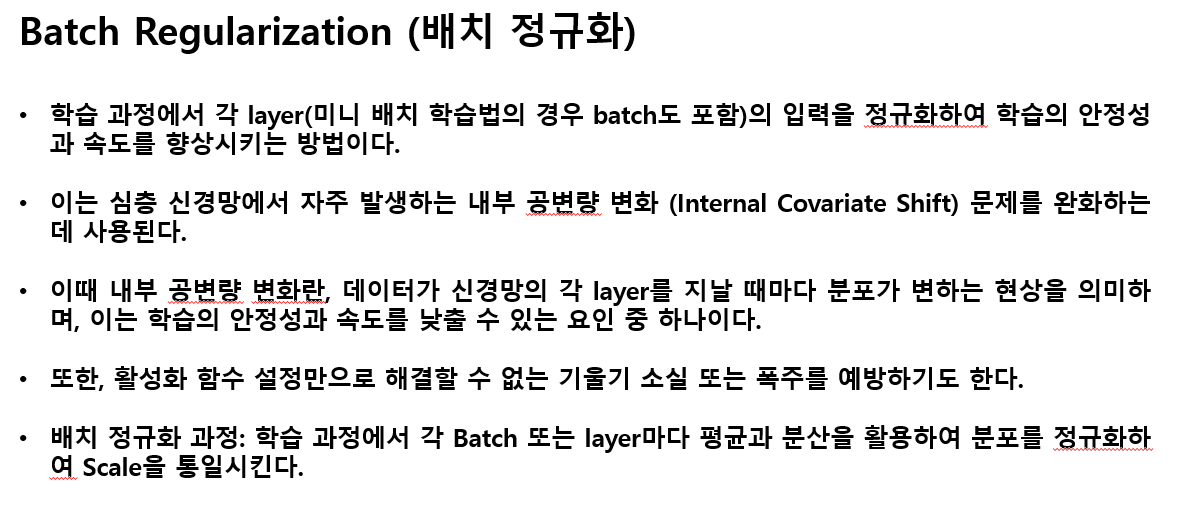

## Checkpoint function

In [97]:
def load(model, checkpoint_dir):
    print(" [*] Reading checkpoints...")

    ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
    if ckpt :
        ckpt_name = os.path.basename(ckpt.model_checkpoint_path)
        checkpoint = tf.train.Checkpoint(dnn=model)
        checkpoint.restore(save_path=os.path.join(checkpoint_dir, ckpt_name))
        counter = int(ckpt_name.split('-')[1])
        print(" [*] Success to read {}".format(ckpt_name))
        return True, counter
    else:
        print(" [*] Failed to find a checkpoint")
        return False, 0

def check_folder(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)
    return dir

## Data load & pre-processing function

In [98]:
def load_mnist() :
    (train_data, train_labels), (test_data, test_labels) = mnist.load_data()
    train_data = np.expand_dims(train_data, axis=-1) # [N, 28, 28] -> [N, 28, 28, 1]
    test_data = np.expand_dims(test_data, axis=-1) # [N, 28, 28] -> [N, 28, 28, 1]

    train_data, test_data = normalize(train_data, test_data)

    train_labels = to_categorical(train_labels, 10) # [N,] -> [N, 10]
    test_labels = to_categorical(test_labels, 10) # [N,] -> [N, 10]

    return train_data, train_labels, test_data, test_labels

def normalize(train_data, test_data):
    train_data = train_data.astype(np.float32) / 255.0
    test_data = test_data.astype(np.float32) / 255.0

    return train_data, test_data

## Performance function

In [99]:
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_pred=logits, y_true=labels, 
                                                                   from_logits=True))
    return loss

def accuracy_fn(model, images, labels):
    logits = model(images, training=False)
    prediction = tf.equal(tf.argmax(logits, -1), tf.argmax(labels, -1))
    accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))
    return accuracy

def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.trainable_variables)

## Model function

In [100]:
def flatten() :
    return tf.keras.layers.Flatten()

def dense(label_dim, weight_init) :
    return tf.keras.layers.Dense(units=label_dim, use_bias=True, kernel_initializer=weight_init)

def relu() :
    return tf.keras.layers.Activation(tf.keras.activations.relu)

def batch_norm() :
    return tf.keras.layers.BatchNormalization()

## Create model (class version)

In [101]:
class create_model_class(tf.keras.Model):
    def __init__(self, label_dim):
        super(create_model_class, self).__init__()
        weight_init = tf.keras.initializers.glorot_uniform()

        self.model = tf.keras.Sequential()
        self.model.add(flatten())

        for i in range(4):
            self.model.add(dense(512, weight_init))
            self.model.add(batch_norm())
            self.model.add(relu())

        self.model.add(dense(label_dim, weight_init))

    def call(self, x, training=None, mask=None):

        x = self.model(x)

        return x

## Create model (function version)

In [102]:
def create_model_function(label_dim) :
    weight_init = tf.keras.initializers.glorot_uniform()

    model = tf.keras.Sequential()
    model.add(flatten())

    for i in range(4) :
        model.add(dense(512, weight_init))
        model.add(batch_norm())
        model.add(relu())

    model.add(dense(label_dim, weight_init))

    return model

## Define data & hyper-parameter

In [103]:
""" dataset """
train_x, train_y, test_x, test_y = load_mnist()

""" parameters """
learning_rate = 0.001
batch_size = 128

training_epochs = 1
training_iterations = len(train_x) // batch_size

label_dim = 10

train_flag = True

""" Graph Input using Dataset API """
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=batch_size).\
    batch(batch_size, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=len(test_x)).\
    batch(len(test_x))

## Define model & optimizer & writer

In [104]:
""" Model """
network = create_model_function(label_dim)

""" Training """
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

""" Writer """
checkpoint_dir = 'checkpoints'
logs_dir = 'logs'

model_dir = 'nn_batchnorm'

checkpoint_dir = os.path.join(checkpoint_dir, model_dir)
check_folder(checkpoint_dir)
checkpoint_prefix = os.path.join(checkpoint_dir, model_dir)
logs_dir = os.path.join(logs_dir, model_dir)

## Restore checkpoint & start train or test phase

In [105]:
if train_flag :

    checkpoint = tf.train.Checkpoint(dnn=network)

    # create writer for tensorboard
    summary_writer = tf.summary.create_file_writer(logdir=logs_dir)
    start_time = time()

    # restore check-point if it exits
    could_load, checkpoint_counter = load(network, checkpoint_dir)    

    if could_load:
        start_epoch = (int)(checkpoint_counter / training_iterations)        
        counter = checkpoint_counter        
        print(" [*] Load SUCCESS")
    else:
        start_epoch = 0
        start_iteration = 0
        counter = 0
        print(" [!] Load failed...")
    
    # train phase
    with summary_writer.as_default():  # for tensorboard
        for epoch in range(start_epoch, training_epochs):
            for idx, (train_input, train_label) in enumerate(train_dataset):            
                grads = grad(network, train_input, train_label)
                optimizer.apply_gradients(grads_and_vars=zip(grads, network.trainable_variables))

                train_loss = loss_fn(network, train_input, train_label)
                train_accuracy = accuracy_fn(network, train_input, train_label)
                
                for test_input, test_label in test_dataset:                
                    test_accuracy = accuracy_fn(network, test_input, test_label)

                tf.summary.scalar(name='train_loss', data=train_loss, step=counter)
                tf.summary.scalar(name='train_accuracy', data=train_accuracy, step=counter)
                tf.summary.scalar(name='test_accuracy', data=test_accuracy, step=counter)

                print(
                    "Epoch: [%2d] [%5d/%5d] time: %4.4f, train_loss: %.8f, train_accuracy: %.4f, test_Accuracy: %.4f" \
                    % (epoch, idx, training_iterations, time() - start_time, train_loss, train_accuracy,
                       test_accuracy))
                counter += 1                
        checkpoint.save(file_prefix=checkpoint_prefix + '-{}'.format(counter))
        
# test phase      
else :
    _, _ = load(network, checkpoint_dir)
    for test_input, test_label in test_dataset:    
        test_accuracy = accuracy_fn(network, test_input, test_label)

    print("test_Accuracy: %.4f" % (test_accuracy))

 [*] Reading checkpoints...
 [*] Failed to find a checkpoint
 [!] Load failed...
Epoch: [ 0] [    0/  468] time: 0.9813, train_loss: 0.27694482, train_accuracy: 0.3047, test_Accuracy: 0.2271
Epoch: [ 0] [    1/  468] time: 1.3850, train_loss: 0.31167185, train_accuracy: 0.4609, test_Accuracy: 0.4256
Epoch: [ 0] [    2/  468] time: 1.8291, train_loss: 0.29634547, train_accuracy: 0.6250, test_Accuracy: 0.5644
Epoch: [ 0] [    3/  468] time: 2.2545, train_loss: 0.30891487, train_accuracy: 0.6875, test_Accuracy: 0.6193
Epoch: [ 0] [    4/  468] time: 2.6907, train_loss: 0.25187892, train_accuracy: 0.6875, test_Accuracy: 0.6585
Epoch: [ 0] [    5/  468] time: 3.1044, train_loss: 0.26215217, train_accuracy: 0.6875, test_Accuracy: 0.7073
Epoch: [ 0] [    6/  468] time: 3.5617, train_loss: 0.30330417, train_accuracy: 0.8594, test_Accuracy: 0.7475
Epoch: [ 0] [    7/  468] time: 4.0126, train_loss: 0.30282211, train_accuracy: 0.7734, test_Accuracy: 0.7782
Epoch: [ 0] [    8/  468] time: 4.4632,

Epoch: [ 0] [  148/  468] time: 20.0733, train_loss: 0.07749590, train_accuracy: 0.9766, test_Accuracy: 0.9559
Epoch: [ 0] [  149/  468] time: 20.1970, train_loss: 0.10683800, train_accuracy: 0.9688, test_Accuracy: 0.9555
Epoch: [ 0] [  150/  468] time: 20.3296, train_loss: 0.15772223, train_accuracy: 0.9453, test_Accuracy: 0.9550
Epoch: [ 0] [  151/  468] time: 20.4533, train_loss: 0.08395267, train_accuracy: 0.9766, test_Accuracy: 0.9552
Epoch: [ 0] [  152/  468] time: 20.5819, train_loss: 0.08575320, train_accuracy: 0.9375, test_Accuracy: 0.9559
Epoch: [ 0] [  153/  468] time: 20.7176, train_loss: 0.07256294, train_accuracy: 0.9688, test_Accuracy: 0.9556
Epoch: [ 0] [  154/  468] time: 20.8452, train_loss: 0.18948507, train_accuracy: 0.9297, test_Accuracy: 0.9554
Epoch: [ 0] [  155/  468] time: 20.9699, train_loss: 0.11677647, train_accuracy: 0.9453, test_Accuracy: 0.9559
Epoch: [ 0] [  156/  468] time: 21.1006, train_loss: 0.12934691, train_accuracy: 0.9453, test_Accuracy: 0.9570
E

Epoch: [ 0] [  222/  468] time: 29.5051, train_loss: 0.08141253, train_accuracy: 0.9609, test_Accuracy: 0.9608
Epoch: [ 0] [  223/  468] time: 29.6307, train_loss: 0.10475951, train_accuracy: 0.9531, test_Accuracy: 0.9607
Epoch: [ 0] [  224/  468] time: 29.7644, train_loss: 0.09060709, train_accuracy: 0.9766, test_Accuracy: 0.9607
Epoch: [ 0] [  225/  468] time: 29.8881, train_loss: 0.11126640, train_accuracy: 0.9531, test_Accuracy: 0.9594
Epoch: [ 0] [  226/  468] time: 30.0137, train_loss: 0.09707939, train_accuracy: 0.9688, test_Accuracy: 0.9591
Epoch: [ 0] [  227/  468] time: 30.1444, train_loss: 0.10313089, train_accuracy: 0.9766, test_Accuracy: 0.9590
Epoch: [ 0] [  228/  468] time: 30.2700, train_loss: 0.05771070, train_accuracy: 0.9844, test_Accuracy: 0.9600
Epoch: [ 0] [  229/  468] time: 30.3937, train_loss: 0.06698586, train_accuracy: 0.9766, test_Accuracy: 0.9615
Epoch: [ 0] [  230/  468] time: 30.5224, train_loss: 0.11574902, train_accuracy: 0.9531, test_Accuracy: 0.9620
E

Epoch: [ 0] [  296/  468] time: 38.8870, train_loss: 0.04859398, train_accuracy: 0.9844, test_Accuracy: 0.9592
Epoch: [ 0] [  297/  468] time: 39.0117, train_loss: 0.02990494, train_accuracy: 1.0000, test_Accuracy: 0.9587
Epoch: [ 0] [  298/  468] time: 39.1383, train_loss: 0.09809260, train_accuracy: 0.9766, test_Accuracy: 0.9590
Epoch: [ 0] [  299/  468] time: 39.2630, train_loss: 0.06100036, train_accuracy: 0.9688, test_Accuracy: 0.9585
Epoch: [ 0] [  300/  468] time: 39.3926, train_loss: 0.06691900, train_accuracy: 0.9844, test_Accuracy: 0.9576
Epoch: [ 0] [  301/  468] time: 39.5153, train_loss: 0.04413445, train_accuracy: 0.9609, test_Accuracy: 0.9575
Epoch: [ 0] [  302/  468] time: 39.6410, train_loss: 0.12962659, train_accuracy: 0.9688, test_Accuracy: 0.9590
Epoch: [ 0] [  303/  468] time: 39.7656, train_loss: 0.09929971, train_accuracy: 0.9766, test_Accuracy: 0.9608
Epoch: [ 0] [  304/  468] time: 39.8953, train_loss: 0.11513779, train_accuracy: 0.9844, test_Accuracy: 0.9619
E

Epoch: [ 0] [  370/  468] time: 48.3128, train_loss: 0.10199833, train_accuracy: 0.9766, test_Accuracy: 0.9686
Epoch: [ 0] [  371/  468] time: 48.4364, train_loss: 0.15238087, train_accuracy: 0.9531, test_Accuracy: 0.9697
Epoch: [ 0] [  372/  468] time: 48.5581, train_loss: 0.10613895, train_accuracy: 0.9766, test_Accuracy: 0.9707
Epoch: [ 0] [  373/  468] time: 48.6968, train_loss: 0.06351810, train_accuracy: 0.9609, test_Accuracy: 0.9725
Epoch: [ 0] [  374/  468] time: 48.8204, train_loss: 0.03646889, train_accuracy: 0.9766, test_Accuracy: 0.9728
Epoch: [ 0] [  375/  468] time: 48.9491, train_loss: 0.07110221, train_accuracy: 0.9922, test_Accuracy: 0.9724
Epoch: [ 0] [  376/  468] time: 49.0787, train_loss: 0.11963235, train_accuracy: 0.9609, test_Accuracy: 0.9714
Epoch: [ 0] [  377/  468] time: 49.2114, train_loss: 0.05185366, train_accuracy: 0.9766, test_Accuracy: 0.9714
Epoch: [ 0] [  378/  468] time: 49.3380, train_loss: 0.03372043, train_accuracy: 0.9922, test_Accuracy: 0.9723
E

Epoch: [ 0] [  444/  468] time: 57.6937, train_loss: 0.05690372, train_accuracy: 0.9844, test_Accuracy: 0.9683
Epoch: [ 0] [  445/  468] time: 57.8174, train_loss: 0.11636702, train_accuracy: 0.9609, test_Accuracy: 0.9685
Epoch: [ 0] [  446/  468] time: 57.9470, train_loss: 0.07634787, train_accuracy: 0.9688, test_Accuracy: 0.9675
Epoch: [ 0] [  447/  468] time: 58.0747, train_loss: 0.04071792, train_accuracy: 0.9922, test_Accuracy: 0.9678
Epoch: [ 0] [  448/  468] time: 58.2013, train_loss: 0.04820122, train_accuracy: 0.9922, test_Accuracy: 0.9686
Epoch: [ 0] [  449/  468] time: 58.3240, train_loss: 0.07842625, train_accuracy: 0.9766, test_Accuracy: 0.9685
Epoch: [ 0] [  450/  468] time: 58.4527, train_loss: 0.05513705, train_accuracy: 0.9844, test_Accuracy: 0.9692
Epoch: [ 0] [  451/  468] time: 58.5753, train_loss: 0.06282906, train_accuracy: 0.9766, test_Accuracy: 0.9692
Epoch: [ 0] [  452/  468] time: 58.6990, train_loss: 0.09079029, train_accuracy: 0.9766, test_Accuracy: 0.9702
E

## Test accuracy : 97.51 %